In [5]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

2.12.0


In [6]:
#Importing modules
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
sensor_names = ['mq2', 'mq3', 'mq8', 'mq135', 'mq136', 'mq137', 'mq131', 'mq9', 'scp1', 'scp2', 'scp3', 'scp4', 'scp5', 'scp6', 'scp7', 'scp8', 'scp9', 'scp10', 'scp11', 'scp12', 'scp13', 'scp14', 'scp15', 'scp16', 'scp17', 'scp18']
sensor_names_with_target = ['mq2', 'mq3', 'mq8', 'mq135', 'mq136', 'mq137', 'mq131', 'mq9', 'scp1', 'scp2', 'scp3', 'scp4', 'scp5', 'scp6', 'scp7', 'scp8', 'scp9', 'scp10', 'scp11', 'scp12', 'scp13', 'scp14', 'scp15', 'scp16', 'scp17', 'scp18', 'target']

DIVISION_VALUE = 10000

Only butter

4500
0       0.007519
1       0.007334
2       0.007640
3       0.007653
4       0.007175
          ...   
4495    0.007267
4496    0.007175
4497    0.007232
4498    0.007330
4499    0.007407
Name: mq2, Length: 4500, dtype: float64


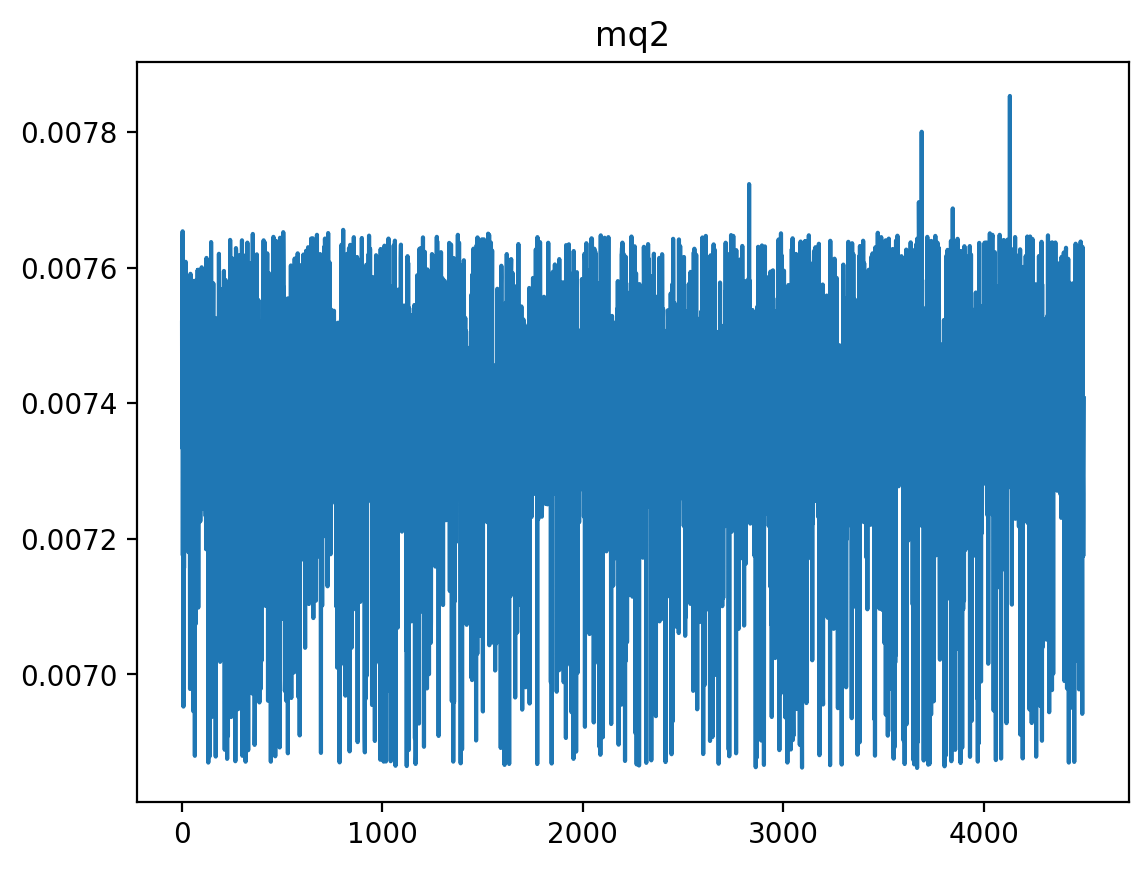

0       0.043484
1       0.046374
2       0.044059
3       0.044052
4       0.036126
          ...   
4495    0.046448
4496    0.036121
4497    0.046355
4498    0.046365
4499    0.037191
Name: mq3, Length: 4500, dtype: float64


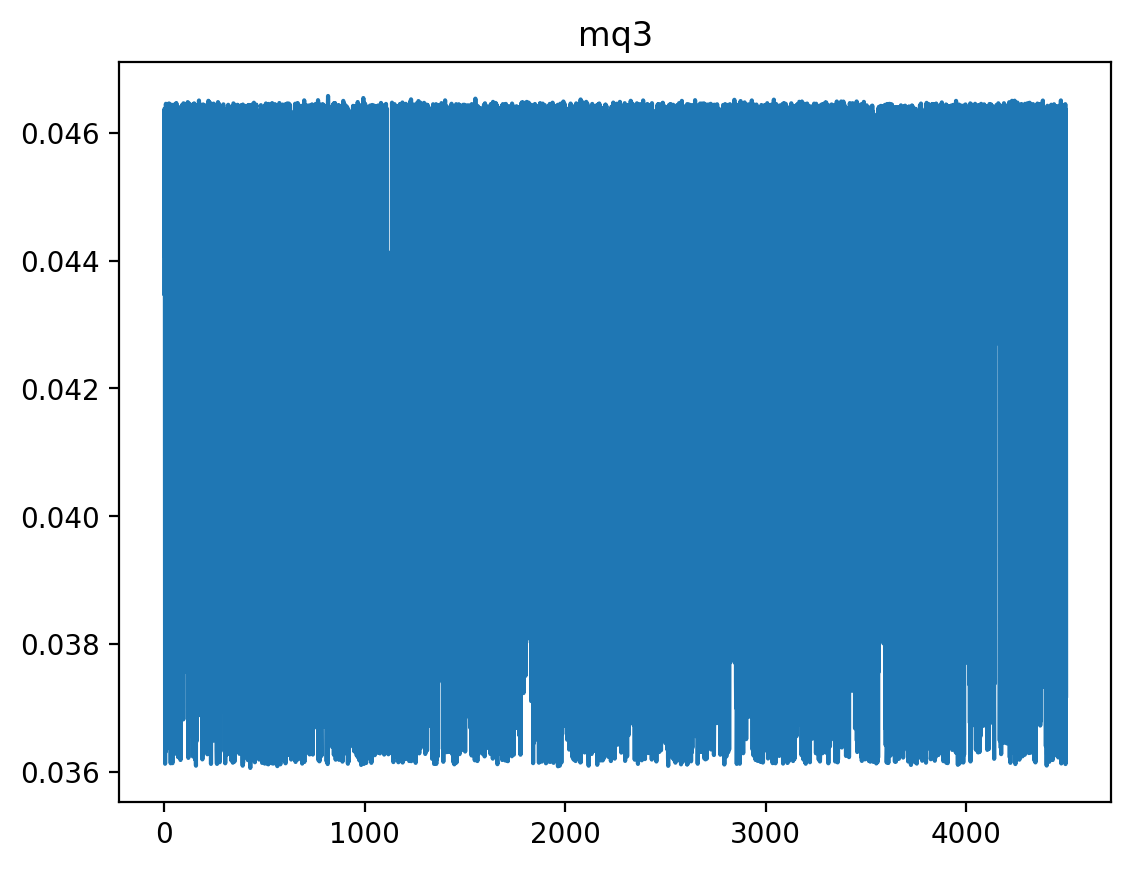

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.007406,0.037176,0.067807,0.002155,0.001790,0.002398,0.009575,0.006481,0.062188,0.025121,...,0.016664,0.015780,0.004562,0.003987,0.002994,0.007525,0.013832,0.005430,0.003873,0
4401,0.007537,0.038552,0.068085,0.002146,0.001747,0.002428,0.008475,0.006654,0.060645,0.024539,...,0.016664,0.015780,0.004606,0.004065,0.003074,0.007435,0.013598,0.005430,0.003873,0
4402,0.006990,0.036098,0.067795,0.002101,0.001805,0.002234,0.011869,0.006001,0.064461,0.025800,...,0.016847,0.015157,0.004606,0.003908,0.002994,0.007345,0.013481,0.005493,0.003873,0
4403,0.007396,0.037096,0.067825,0.002157,0.001795,0.002396,0.009547,0.006408,0.062269,0.025024,...,0.016619,0.015780,0.004562,0.003987,0.002994,0.007525,0.013832,0.005430,0.003873,0
4404,0.007215,0.036269,0.067630,0.002136,0.001811,0.002327,0.010620,0.006239,0.063974,0.025509,...,0.016756,0.015676,0.004606,0.004065,0.003074,0.007614,0.014067,0.005493,0.003873,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.007267,0.046448,0.070463,0.002564,0.002138,0.002649,0.008919,0.007673,0.069007,0.026673,...,0.017395,0.014846,0.004782,0.003908,0.002913,0.007077,0.012660,0.006061,0.003967,0
4496,0.007175,0.036121,0.067577,0.002133,0.001814,0.002317,0.010747,0.006231,0.064136,0.025606,...,0.016801,0.015780,0.004606,0.004065,0.003074,0.007614,0.014067,0.005556,0.003873,0
4497,0.007232,0.046355,0.069537,0.002485,0.002110,0.002520,0.013087,0.006684,0.070063,0.027448,...,0.017669,0.014846,0.004782,0.003908,0.002913,0.007256,0.013012,0.005935,0.003967,0
4498,0.007330,0.046365,0.069987,0.002531,0.002142,0.002593,0.010364,0.007400,0.069495,0.027157,...,0.017532,0.014846,0.004782,0.003908,0.002913,0.007077,0.012660,0.006061,0.003967,0


In [8]:
# Load the data.
data_path = '/content/butter_only_4500.csv'
data_frame_only_butter = pd.read_csv(data_path)
# Print length.
print(data_frame_only_butter.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_only_butter.loc[:, each] = data_frame_only_butter[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_only_butter = data_frame_only_butter.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_only_butter = shuffled_data_frame_only_butter.drop(shuffled_data_frame_only_butter.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_only_butter.columns[:2]:
    print(shuffled_data_frame_only_butter[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_only_butter[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_only_butter[4400:4500]

Half sugar

4500
0       0.008167
1       0.007202
2       0.008281
3       0.008287
4       0.007688
          ...   
4495    0.007334
4496    0.007699
4497    0.006806
4498    0.007212
4499    0.007733
Name: mq2, Length: 4500, dtype: float64


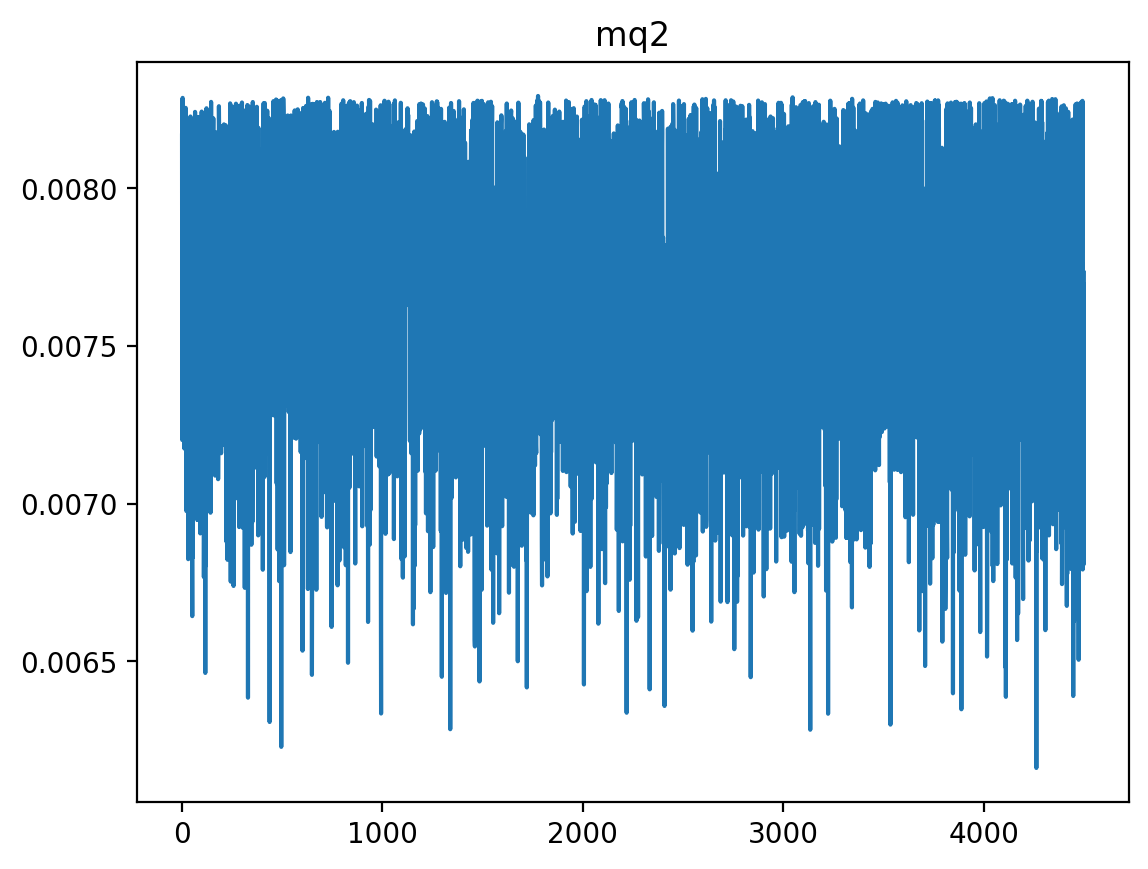

0       0.048350
1       0.047386
2       0.048596
3       0.048590
4       0.047157
          ...   
4495    0.048517
4496    0.047213
4497    0.046533
4498    0.047580
4499    0.047030
Name: mq3, Length: 4500, dtype: float64


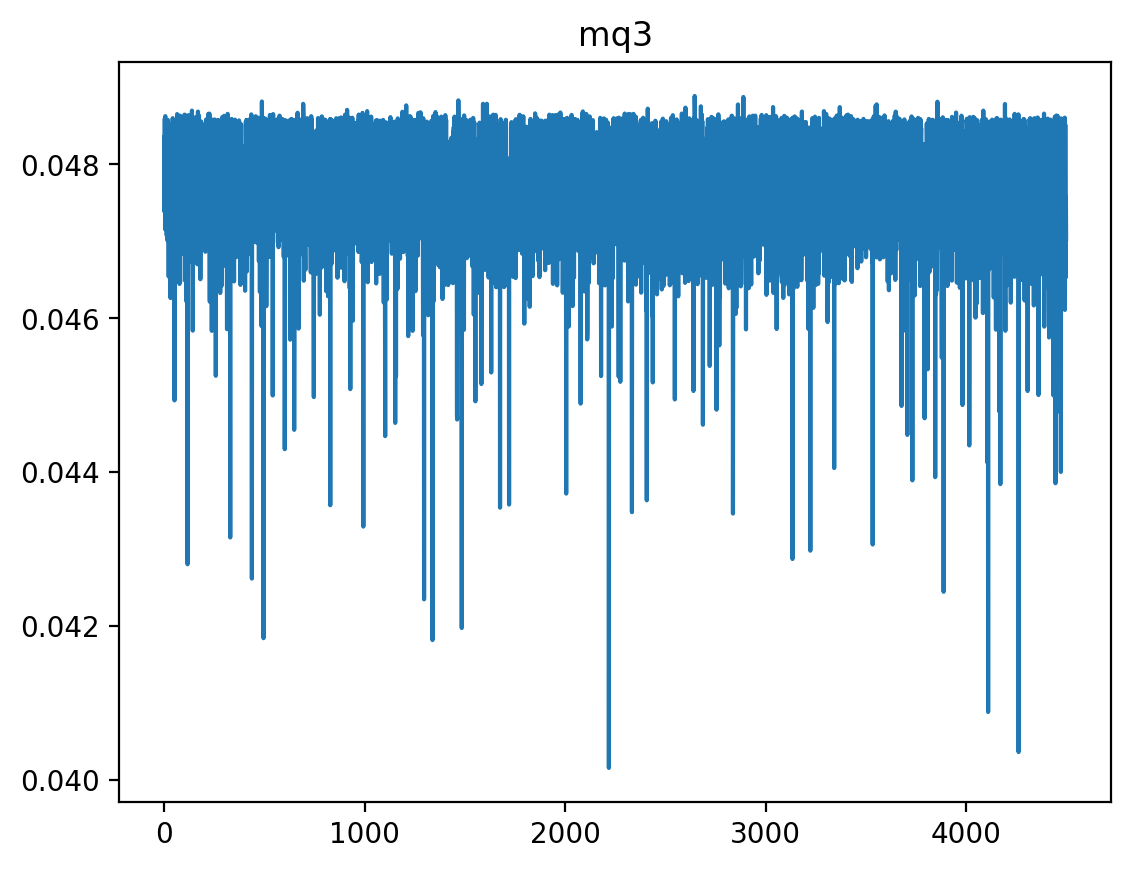

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.007759,0.047066,0.069303,0.002690,0.002474,0.003126,0.010305,0.008104,0.038482,0.015810,...,0.014792,0.012977,0.003904,0.003439,0.002508,0.005912,0.010550,0.004609,0.003306,1
4401,0.007837,0.047160,0.069647,0.002724,0.002512,0.003242,0.009355,0.008390,0.036371,0.015034,...,0.014564,0.012977,0.003860,0.003361,0.002508,0.005823,0.010433,0.004483,0.003306,1
4402,0.007625,0.047571,0.068882,0.002633,0.002409,0.002923,0.012615,0.007477,0.041648,0.017070,...,0.015112,0.013288,0.003992,0.003517,0.002589,0.006091,0.010902,0.004735,0.003400,1
4403,0.007763,0.047053,0.069332,0.002692,0.002477,0.003131,0.010300,0.008117,0.038482,0.015810,...,0.014792,0.012977,0.003904,0.003439,0.002508,0.005912,0.010550,0.004609,0.003306,1
4404,0.007702,0.047131,0.069176,0.002663,0.002448,0.003039,0.011390,0.007844,0.039943,0.016391,...,0.014929,0.012977,0.003948,0.003439,0.002589,0.006002,0.010785,0.004609,0.003306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.007334,0.048517,0.066514,0.002623,0.002548,0.003122,0.009647,0.007998,0.032718,0.013288,...,0.013149,0.011835,0.003466,0.003048,0.002265,0.005285,0.009612,0.003915,0.003023,1
4496,0.007699,0.047213,0.069183,0.002660,0.002444,0.003027,0.011528,0.007809,0.040187,0.016488,...,0.014929,0.013185,0.003948,0.003439,0.002589,0.006002,0.010785,0.004672,0.003306,1
4497,0.006806,0.046533,0.067193,0.002521,0.002409,0.002774,0.013214,0.006594,0.036858,0.014840,...,0.013742,0.012147,0.003553,0.003127,0.002346,0.005554,0.010198,0.004104,0.003117,1
4498,0.007212,0.047580,0.066810,0.002580,0.002485,0.003059,0.010868,0.007786,0.034341,0.013967,...,0.013331,0.011835,0.003509,0.003048,0.002346,0.005375,0.009730,0.003978,0.003117,1


In [9]:
# Load the data.
data_path = '/content/butter_half_sugar_4500.csv'
data_frame_half_sugar = pd.read_csv(data_path)
# Print length.
print(data_frame_half_sugar.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_half_sugar.loc[:, each] = data_frame_half_sugar[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_half_sugar = data_frame_half_sugar.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_half_sugar = shuffled_data_frame_half_sugar.drop(shuffled_data_frame_half_sugar.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_half_sugar.columns[:2]:
    print(shuffled_data_frame_half_sugar[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_half_sugar[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_half_sugar[4400:4500]

Whole sugar

4500
0       0.007918
1       0.007964
2       0.007989
3       0.007986
4       0.007081
          ...   
4495    0.008173
4496    0.007089
4497    0.007742
4498    0.007997
4499    0.007173
Name: mq2, Length: 4500, dtype: float64


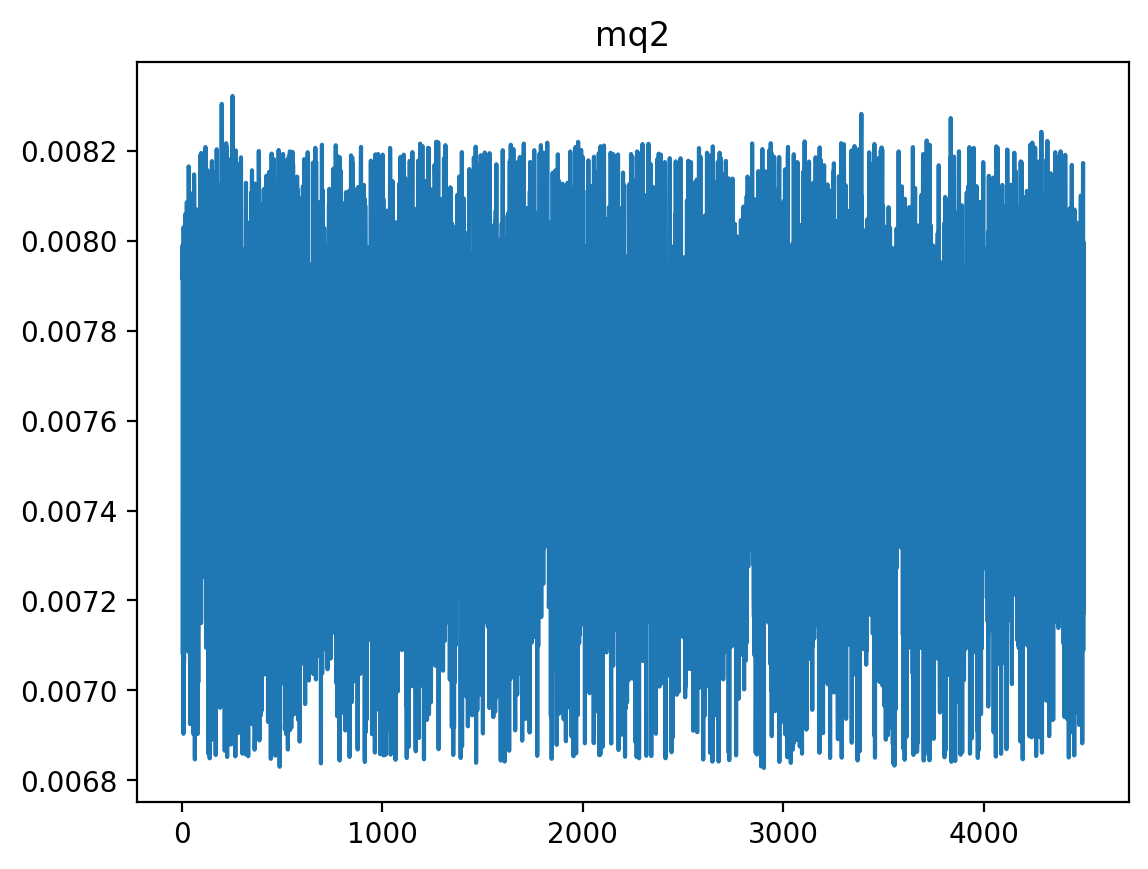

0       0.047312
1       0.043645
2       0.047696
3       0.047579
4       0.046143
          ...   
4495    0.044678
4496    0.046189
4497    0.044028
4498    0.043815
4499    0.046190
Name: mq3, Length: 4500, dtype: float64


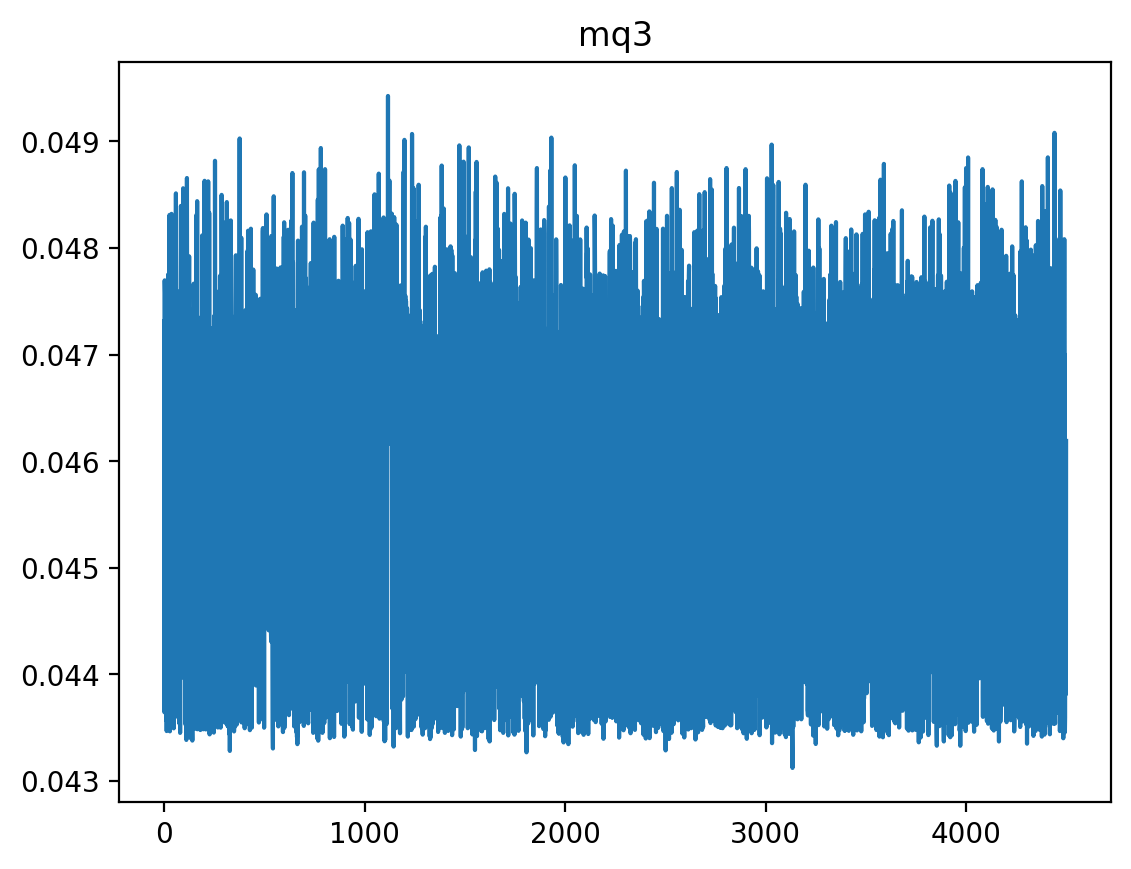

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.007172,0.046234,0.067158,0.002572,0.002566,0.002950,0.009178,0.007593,0.029308,0.012415,...,0.012921,0.011628,0.003422,0.002970,0.002265,0.005016,0.009144,0.003915,0.003117,2
4401,0.007362,0.046695,0.068373,0.002723,0.002652,0.003021,0.008851,0.007799,0.027197,0.011542,...,0.012692,0.011420,0.003334,0.002970,0.002184,0.004927,0.008792,0.003788,0.003023,2
4402,0.006941,0.046108,0.066613,0.002507,0.002493,0.002897,0.011280,0.007146,0.032961,0.013870,...,0.013331,0.011835,0.003509,0.003048,0.002346,0.005285,0.009495,0.004104,0.003117,2
4403,0.007186,0.046181,0.067227,0.002568,0.002573,0.002956,0.009176,0.007598,0.029227,0.012415,...,0.012921,0.011628,0.003422,0.002970,0.002265,0.005016,0.009144,0.003915,0.003117,2
4404,0.007089,0.046164,0.066694,0.002537,0.002524,0.002929,0.009859,0.007447,0.031094,0.013191,...,0.013103,0.011731,0.003466,0.003048,0.002265,0.005106,0.009261,0.004041,0.003117,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.008173,0.044678,0.065641,0.002703,0.002276,0.002671,0.009626,0.007340,0.022732,0.009699,...,0.011962,0.010589,0.003158,0.002814,0.002104,0.004658,0.008440,0.003473,0.002834,2
4496,0.007089,0.046189,0.066700,0.002515,0.002528,0.002942,0.009996,0.007428,0.031337,0.013288,...,0.013103,0.011731,0.003466,0.003048,0.002265,0.005195,0.009378,0.004041,0.003117,2
4497,0.007742,0.044028,0.065332,0.002350,0.001869,0.002345,0.012123,0.006388,0.027116,0.011445,...,0.012601,0.011108,0.003290,0.002970,0.002265,0.005016,0.009026,0.003725,0.002928,2
4498,0.007997,0.043815,0.064884,0.002578,0.002160,0.002583,0.009892,0.006964,0.024193,0.010378,...,0.012190,0.010797,0.003202,0.002892,0.002184,0.004748,0.008557,0.003599,0.002928,2


In [10]:
# Load the data.
data_path = '/content/butter_whole_sugar_4500.csv'
data_frame_whole_sugar = pd.read_csv(data_path)
# Print length.
print(data_frame_whole_sugar.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_whole_sugar.loc[:, each] = data_frame_whole_sugar[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_whole_sugar = data_frame_whole_sugar.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_whole_sugar = shuffled_data_frame_whole_sugar.drop(shuffled_data_frame_whole_sugar.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_whole_sugar.columns[:2]:
    print(shuffled_data_frame_whole_sugar[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_whole_sugar[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_whole_sugar[4400:4500]

2 eggs

4500
0       0.008364
1       0.008144
2       0.008484
3       0.008458
4       0.008471
          ...   
4495    0.008337
4496    0.008482
4497    0.007828
4498    0.008163
4499    0.008608
Name: mq2, Length: 4500, dtype: float64


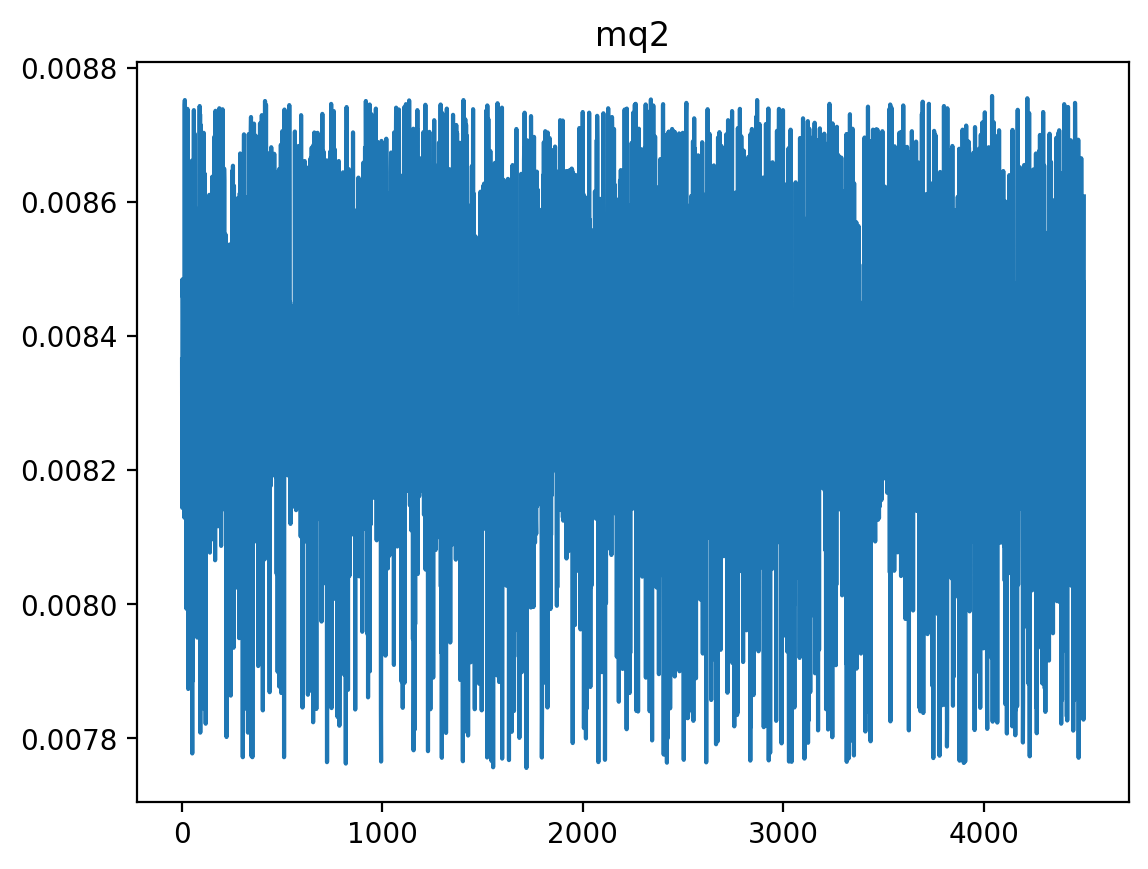

0       0.055277
1       0.051668
2       0.055343
3       0.055359
4       0.052606
          ...   
4495    0.053215
4496    0.052628
4497    0.051263
4498    0.051726
4499    0.053003
Name: mq3, Length: 4500, dtype: float64


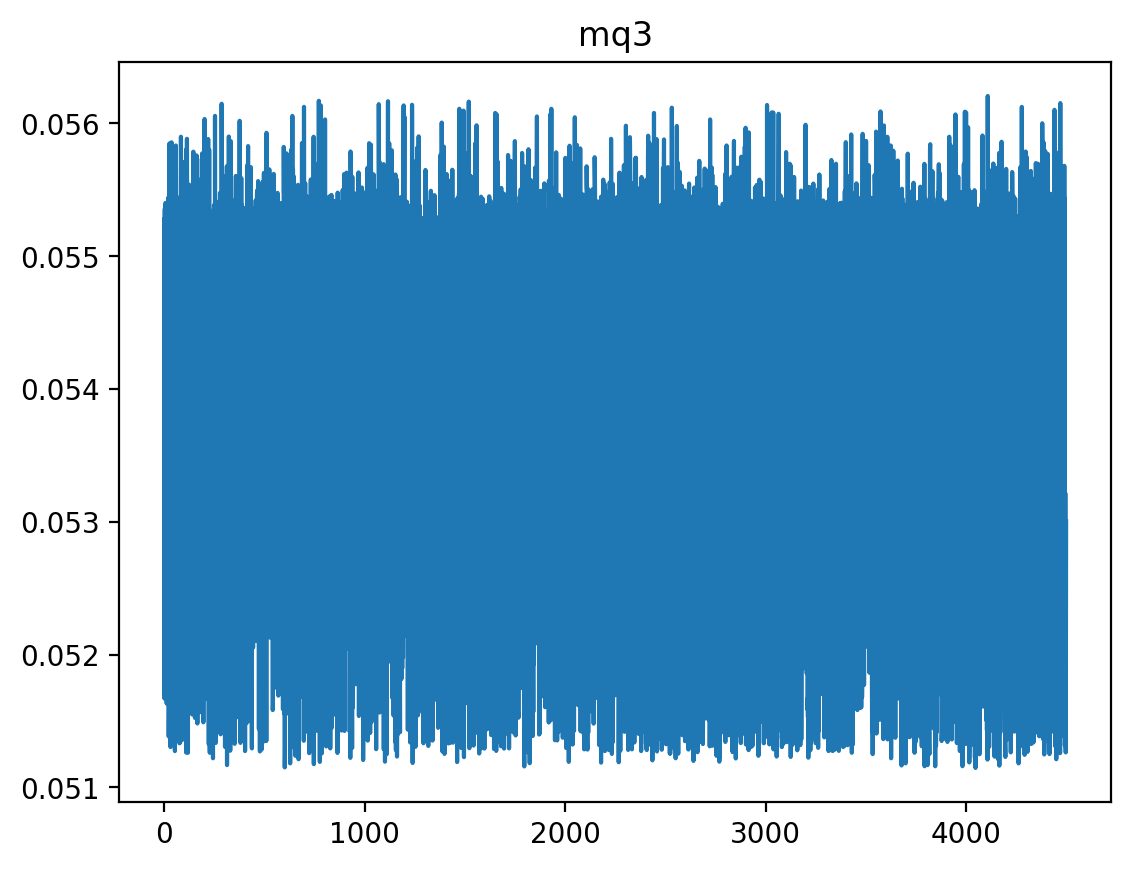

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.008609,0.053004,0.064929,0.003066,0.002895,0.003397,0.012401,0.008515,0.029308,0.011348,...,0.013468,0.012354,0.003509,0.003205,0.002346,0.005195,0.009730,0.004104,0.003211,3
4401,0.008745,0.053875,0.064620,0.003170,0.003084,0.003544,0.012154,0.008713,0.026791,0.010281,...,0.013012,0.012147,0.003422,0.003048,0.002346,0.005106,0.009495,0.003915,0.003117,3
4402,0.008302,0.052153,0.065422,0.002916,0.002678,0.003141,0.013569,0.007753,0.034260,0.013385,...,0.014108,0.012873,0.003641,0.003283,0.002427,0.005554,0.010316,0.004356,0.003306,3
4403,0.008605,0.053020,0.064896,0.003068,0.002897,0.003398,0.012397,0.008510,0.029227,0.011348,...,0.013423,0.012354,0.003509,0.003127,0.002346,0.005285,0.009730,0.004104,0.003211,3
4404,0.008491,0.052677,0.065031,0.002975,0.002764,0.003281,0.012899,0.008236,0.031906,0.012415,...,0.013834,0.012666,0.003597,0.003205,0.002427,0.005375,0.010081,0.004230,0.003306,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.008337,0.053215,0.063555,0.003077,0.003204,0.003262,0.012375,0.007639,0.024031,0.011251,...,0.013514,0.011628,0.003553,0.003283,0.002346,0.005195,0.009144,0.004104,0.003117,3
4496,0.008482,0.052628,0.065099,0.002970,0.002754,0.003269,0.012968,0.008199,0.032231,0.012609,...,0.013834,0.012562,0.003597,0.003205,0.002427,0.005375,0.010081,0.004230,0.003306,3
4497,0.007828,0.051263,0.064697,0.002883,0.002848,0.002936,0.014040,0.006517,0.028902,0.012803,...,0.014016,0.011939,0.003729,0.003439,0.002427,0.005554,0.009847,0.004420,0.003211,3
4498,0.008163,0.051726,0.063515,0.002971,0.003008,0.003130,0.012678,0.007224,0.025979,0.011736,...,0.013697,0.011835,0.003641,0.003361,0.002427,0.005375,0.009378,0.004230,0.003211,3


In [11]:
# Load the data.
data_path = '/content/eggs_2_4500.csv'
data_frame_two_eggs = pd.read_csv(data_path)
# Print length.
print(data_frame_two_eggs.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_two_eggs.loc[:, each] = data_frame_two_eggs[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_two_eggs = data_frame_two_eggs.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_two_eggs = shuffled_data_frame_two_eggs.drop(shuffled_data_frame_two_eggs.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_two_eggs.columns[:2]:
    print(shuffled_data_frame_two_eggs[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_two_eggs[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_two_eggs[4400:4500]

4 eggs

4500
0       0.008589
1       0.008630
2       0.008621
3       0.008628
4       0.008763
          ...   
4495    0.008764
4496    0.008771
4497    0.008337
4498    0.008659
4499    0.008782
Name: mq2, Length: 4500, dtype: float64


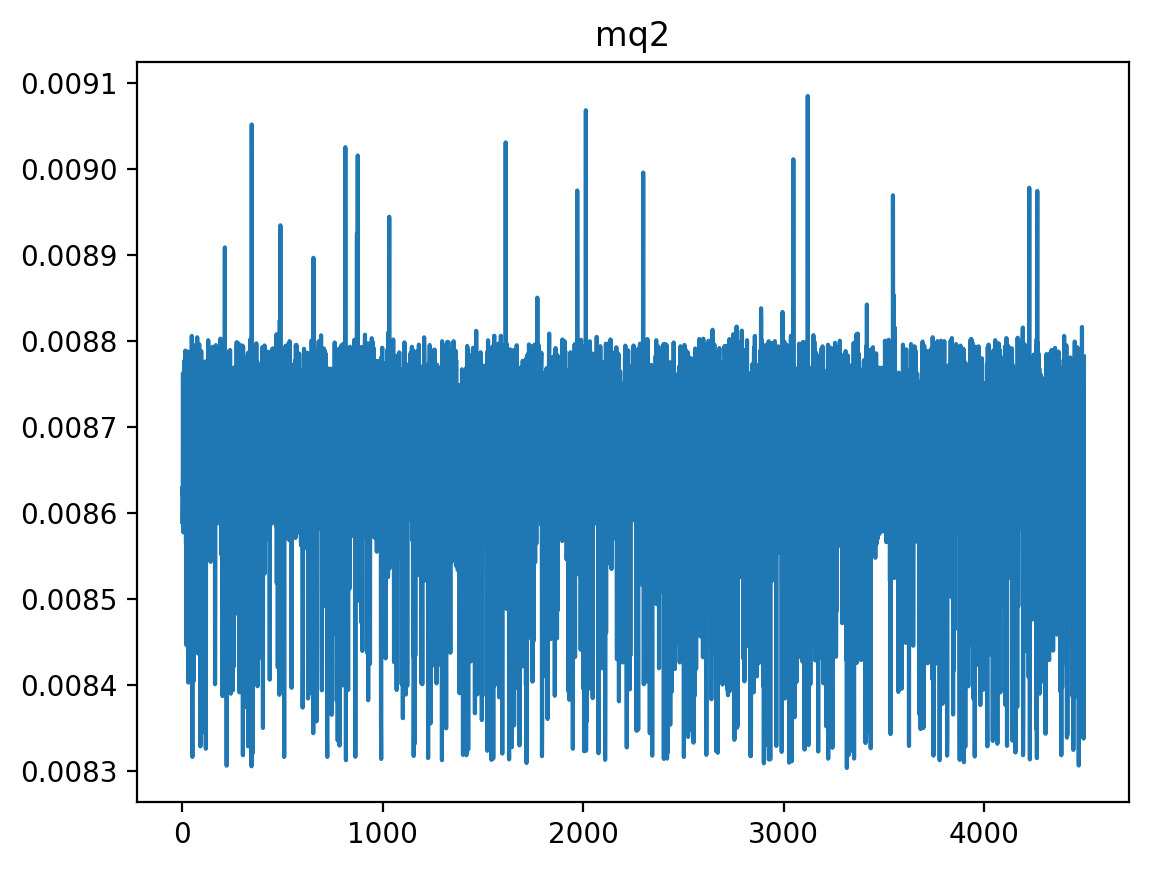

0       0.055448
1       0.055170
2       0.055468
3       0.055490
4       0.056522
          ...   
4495    0.056099
4496    0.056575
4497    0.054382
4498    0.055276
4499    0.056468
Name: mq3, Length: 4500, dtype: float64


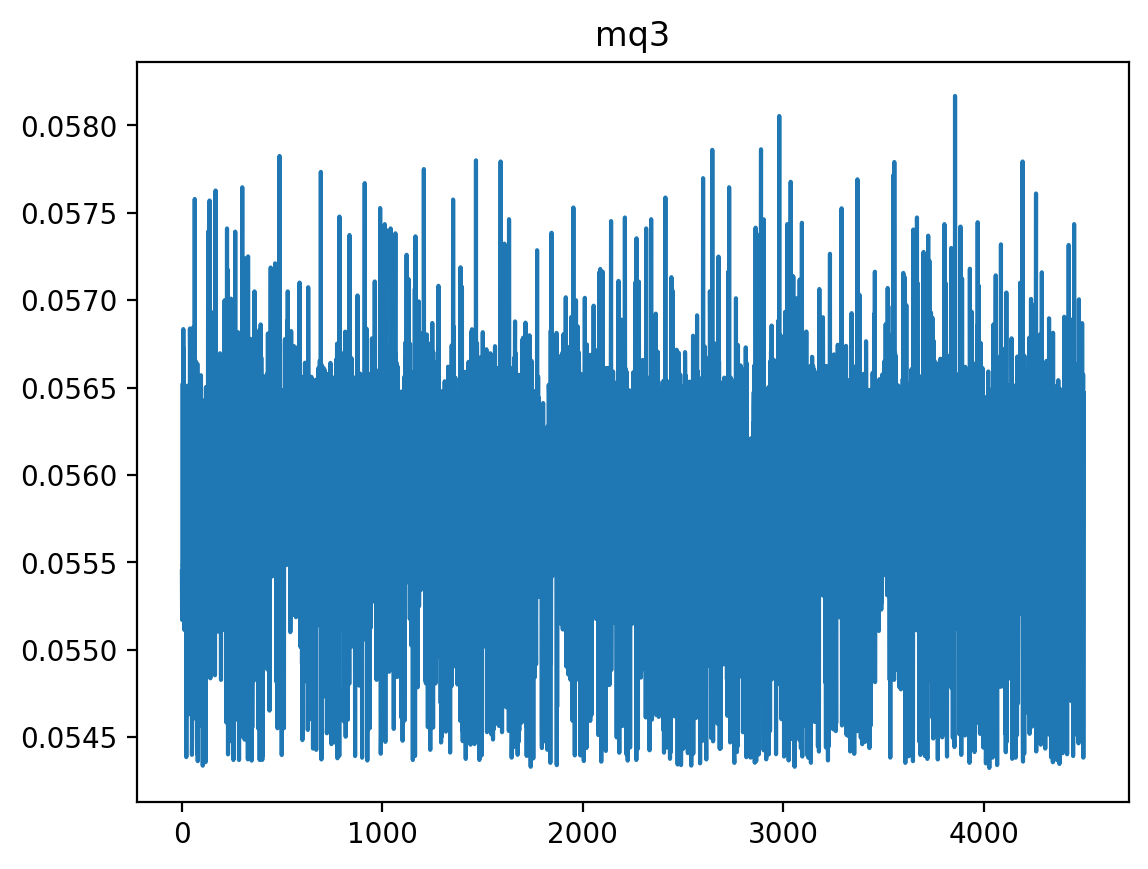

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.008806,0.056477,0.068489,0.003328,0.003309,0.003623,0.013062,0.008390,0.065679,0.025509,...,0.017212,0.014950,0.004650,0.003908,0.002913,0.006718,0.012074,0.005430,0.003873,4
4401,0.008739,0.056351,0.067685,0.003283,0.003268,0.003560,0.011938,0.008308,0.063649,0.025218,...,0.016984,0.014742,0.004562,0.003987,0.002913,0.006718,0.012074,0.005430,0.003873,4
4402,0.008725,0.056905,0.069540,0.003329,0.003240,0.003565,0.014368,0.008206,0.070956,0.026285,...,0.016893,0.014742,0.004518,0.003830,0.002832,0.006808,0.012074,0.005493,0.003778,4
4403,0.008786,0.056509,0.068596,0.003331,0.003311,0.003627,0.013055,0.008380,0.065923,0.025509,...,0.017212,0.014742,0.004650,0.003908,0.002913,0.006718,0.012074,0.005430,0.003873,4
4404,0.008765,0.056381,0.068949,0.003321,0.003282,0.003610,0.013747,0.008347,0.068358,0.025897,...,0.017075,0.014742,0.004606,0.003908,0.002913,0.006718,0.012074,0.005493,0.003778,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.008764,0.056099,0.067084,0.003441,0.003493,0.003684,0.013922,0.008399,0.047656,0.019980,...,0.015614,0.014327,0.004299,0.003830,0.002832,0.006450,0.011488,0.005177,0.003684,4
4496,0.008771,0.056575,0.069165,0.003328,0.003285,0.003612,0.013866,0.008316,0.068520,0.025994,...,0.017075,0.014742,0.004606,0.003908,0.002832,0.006718,0.012074,0.005493,0.003873,4
4497,0.008337,0.054382,0.067758,0.003301,0.003315,0.003422,0.014871,0.007434,0.047331,0.019786,...,0.015843,0.014431,0.004343,0.003830,0.002832,0.006718,0.011957,0.005177,0.003684,4
4498,0.008659,0.055276,0.067277,0.003403,0.003435,0.003617,0.014160,0.008125,0.047899,0.019980,...,0.015660,0.014431,0.004343,0.003830,0.002832,0.006539,0.011605,0.005177,0.003684,4


In [12]:
# Load the data.
data_path = '/content/eggs_4_4500.csv'
data_frame_four_eggs = pd.read_csv(data_path)
# Print length.
print(data_frame_four_eggs.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_four_eggs.loc[:, each] = data_frame_four_eggs[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_four_eggs = data_frame_four_eggs.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_four_eggs = shuffled_data_frame_four_eggs.drop(shuffled_data_frame_four_eggs.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_four_eggs.columns[:2]:
    print(shuffled_data_frame_four_eggs[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_four_eggs[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_four_eggs[4400:4500]

Half flour

4500
0       0.009088
1       0.008350
2       0.009177
3       0.009182
4       0.009064
          ...   
4495    0.008506
4496    0.009067
4497    0.008814
4498    0.008356
4499    0.008836
Name: mq2, Length: 4500, dtype: float64


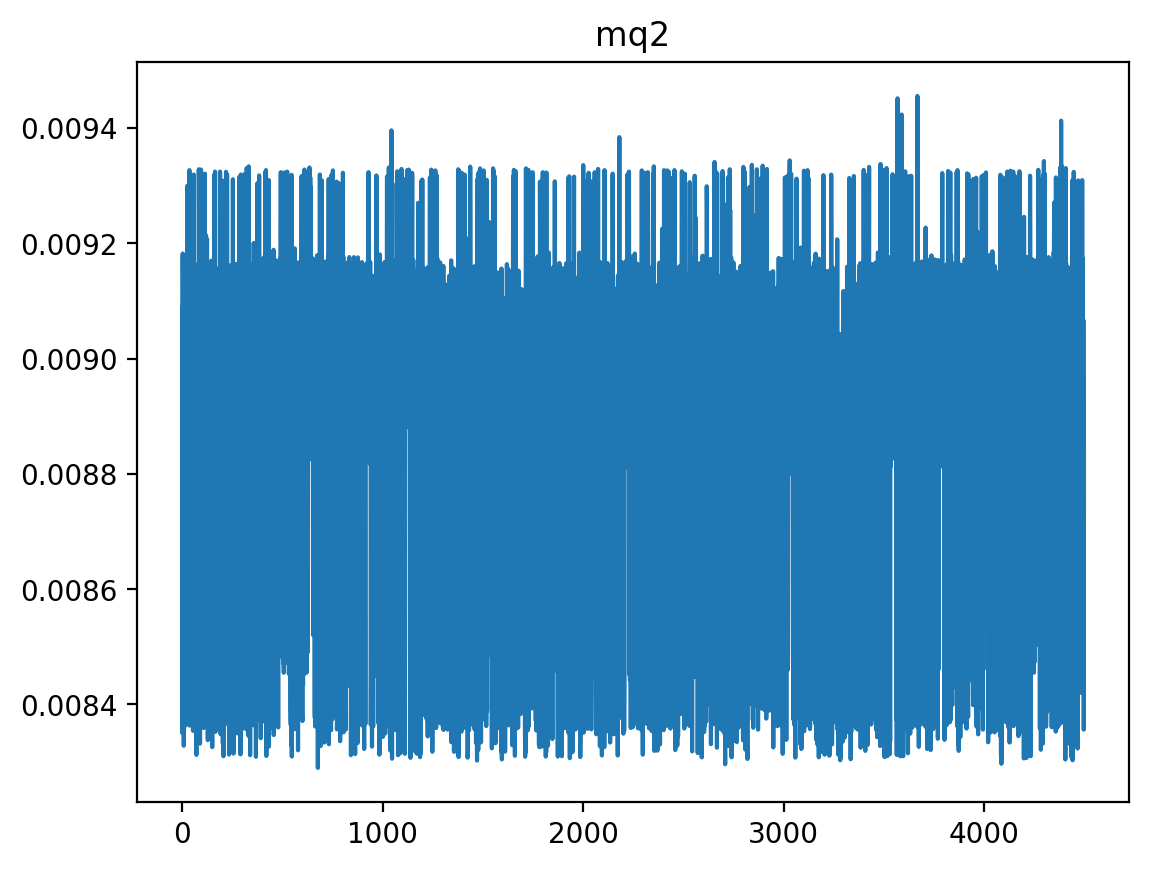

0       0.057967
1       0.055212
2       0.058418
3       0.058422
4       0.057392
          ...   
4495    0.056508
4496    0.057342
4497    0.058261
4498    0.054580
4499    0.056604
Name: mq3, Length: 4500, dtype: float64


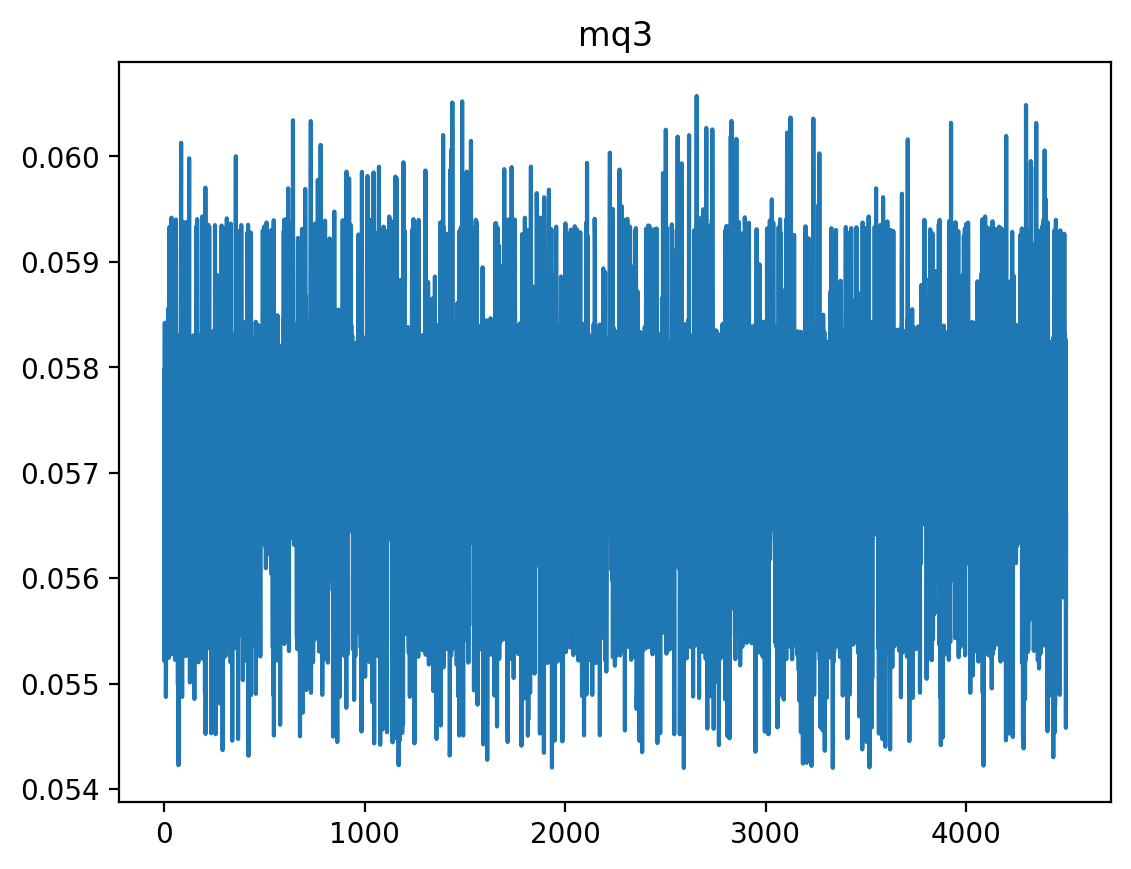

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.008822,0.056546,0.068985,0.003272,0.003373,0.003643,0.014041,0.008643,0.048062,0.021920,...,0.016299,0.014431,0.004299,0.003830,0.002832,0.006539,0.012308,0.005493,0.003967,5
4401,0.008907,0.056473,0.067564,0.003283,0.003489,0.003740,0.013064,0.008786,0.044977,0.020174,...,0.015706,0.013911,0.004211,0.003674,0.002751,0.006181,0.011605,0.005367,0.003873,5
4402,0.008978,0.057045,0.066244,0.003319,0.003574,0.003793,0.012515,0.008834,0.045139,0.018622,...,0.015112,0.013392,0.004123,0.003517,0.002670,0.006002,0.011136,0.005177,0.003684,5
4403,0.008841,0.056598,0.068911,0.003277,0.003379,0.003650,0.014038,0.008651,0.048062,0.021920,...,0.016299,0.014431,0.004299,0.003830,0.002832,0.006539,0.012308,0.005556,0.003967,5
4404,0.009070,0.057466,0.066066,0.003349,0.003605,0.003820,0.012467,0.008903,0.046276,0.018525,...,0.014975,0.013392,0.004123,0.003517,0.002670,0.006002,0.011136,0.005177,0.003684,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.008506,0.056508,0.066354,0.003396,0.003522,0.003628,0.011571,0.007992,0.027765,0.014064,...,0.012144,0.012769,0.003860,0.003283,0.002508,0.005643,0.010667,0.004672,0.003211,5
4496,0.009067,0.057342,0.066066,0.003342,0.003601,0.003818,0.012469,0.008863,0.046113,0.018525,...,0.014975,0.013392,0.004123,0.003517,0.002670,0.006002,0.011136,0.005177,0.003684,5
4497,0.008814,0.058261,0.067312,0.003510,0.003693,0.003834,0.011940,0.008344,0.027847,0.014355,...,0.012053,0.012562,0.003729,0.003283,0.002508,0.005733,0.011136,0.004735,0.003306,5
4498,0.008356,0.054580,0.066083,0.003252,0.003350,0.003484,0.012164,0.007872,0.029714,0.015034,...,0.012373,0.012769,0.003817,0.003283,0.002508,0.005643,0.010667,0.004609,0.003306,5


In [13]:
# Load the data.
data_path = '/content/flour_half_4500.csv'
data_frame_flour_half = pd.read_csv(data_path)
# Print length.
print(data_frame_flour_half.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_flour_half.loc[:, each] = data_frame_flour_half[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_flour_half = data_frame_flour_half.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_flour_half = shuffled_data_frame_flour_half.drop(shuffled_data_frame_flour_half.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_flour_half.columns[:2]:
    print(shuffled_data_frame_flour_half[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_flour_half[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_flour_half[4400:4500]

Whole flour

4500
0       0.009070
1       0.008511
2       0.009215
3       0.009224
4       0.009063
          ...   
4495    0.008708
4496    0.009074
4497    0.008276
4498    0.008537
4499    0.009145
Name: mq2, Length: 4500, dtype: float64


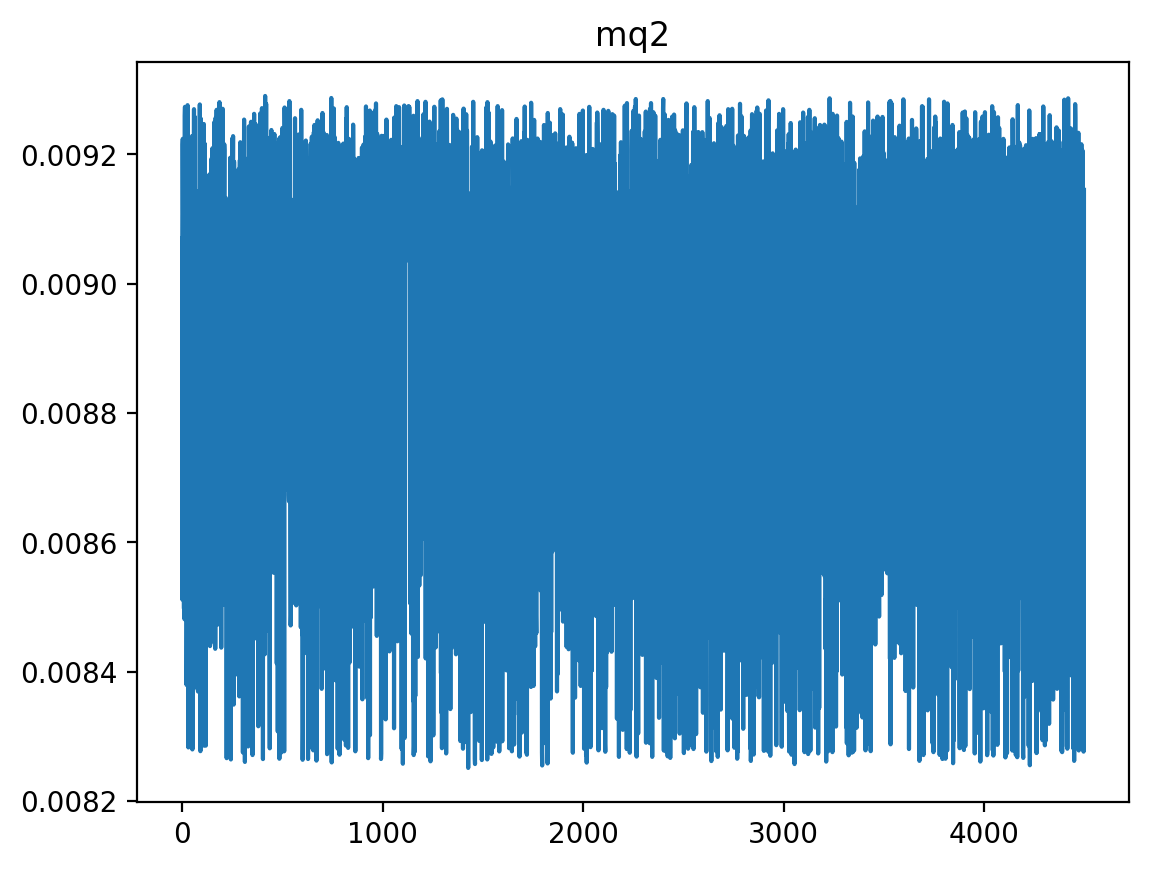

0       0.058683
1       0.055002
2       0.058788
3       0.058775
4       0.056482
          ...   
4495    0.056408
4496    0.056473
4497    0.054277
4498    0.055143
4499    0.056837
Name: mq3, Length: 4500, dtype: float64


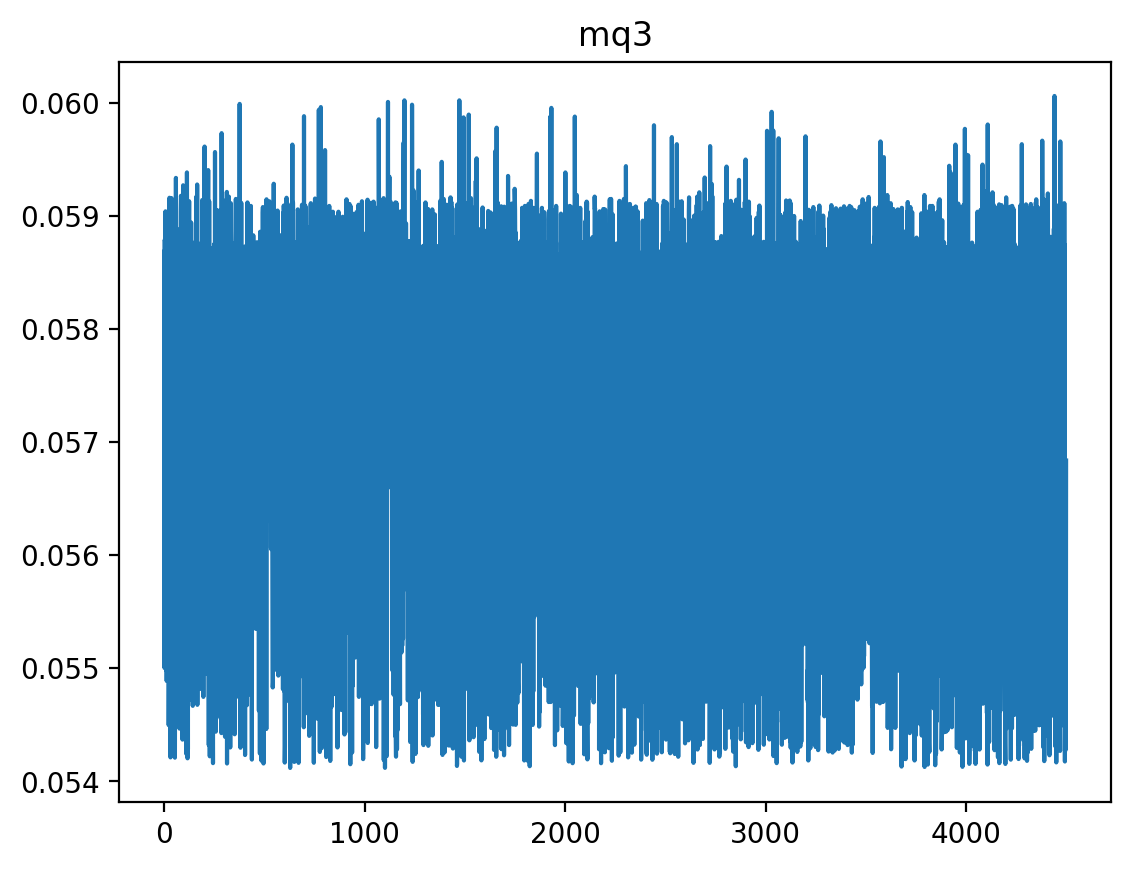

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.009144,0.056889,0.066625,0.003354,0.003605,0.003827,0.013090,0.008833,0.036371,0.017846,...,0.014153,0.013288,0.003992,0.003596,0.002670,0.006091,0.011605,0.005177,0.003684,6
4401,0.009285,0.057454,0.066632,0.003417,0.003705,0.003917,0.012926,0.008958,0.034504,0.016779,...,0.013788,0.013081,0.003904,0.003517,0.002589,0.005912,0.011253,0.005051,0.003684,6
4402,0.009055,0.056889,0.067576,0.003357,0.003549,0.003753,0.013936,0.008494,0.041567,0.020077,...,0.014884,0.013911,0.004167,0.003674,0.002751,0.006450,0.012191,0.005430,0.003873,6
4403,0.009156,0.056928,0.066654,0.003354,0.003604,0.003829,0.013082,0.008798,0.036371,0.017749,...,0.014108,0.013496,0.003992,0.003596,0.002670,0.006091,0.011605,0.005177,0.003684,6
4404,0.009089,0.056640,0.067003,0.003328,0.003547,0.003782,0.013429,0.008658,0.038888,0.018913,...,0.014519,0.013704,0.004080,0.003596,0.002670,0.006181,0.011840,0.005304,0.003778,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.008708,0.056408,0.062954,0.003180,0.003341,0.003685,0.012216,0.008320,0.026142,0.013288,...,0.012601,0.012043,0.003729,0.003283,0.002427,0.005285,0.009964,0.004735,0.003306,6
4496,0.009074,0.056473,0.067062,0.003331,0.003546,0.003775,0.013462,0.008674,0.039131,0.019107,...,0.014564,0.013911,0.004080,0.003596,0.002670,0.006271,0.011957,0.005304,0.003778,6
4497,0.008276,0.054277,0.064987,0.003066,0.003122,0.003401,0.014046,0.007705,0.027684,0.013870,...,0.012875,0.012043,0.003729,0.003205,0.002427,0.005554,0.010433,0.004798,0.003306,6
4498,0.008537,0.055143,0.063639,0.003121,0.003256,0.003592,0.012530,0.008180,0.026872,0.013579,...,0.012647,0.011939,0.003729,0.003205,0.002427,0.005285,0.010081,0.004735,0.003306,6


In [14]:
# Load the data.
data_path = '/content/flour_whole_4500.csv'
data_frame_flour_whole = pd.read_csv(data_path)
# Print length.
print(data_frame_flour_whole.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_flour_whole.loc[:, each] = data_frame_flour_whole[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_flour_whole = data_frame_flour_whole.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_flour_whole = shuffled_data_frame_flour_whole.drop(shuffled_data_frame_flour_whole.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_flour_whole.columns[:2]:
    print(shuffled_data_frame_flour_whole[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_flour_whole[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_flour_whole[4400:4500]

Half milk

4500
0       0.008342
1       0.008658
2       0.008382
3       0.008389
4       0.008623
          ...   
4495    0.008871
4496    0.008625
4497    0.008411
4498    0.008674
4499    0.008624
Name: mq2, Length: 4500, dtype: float64


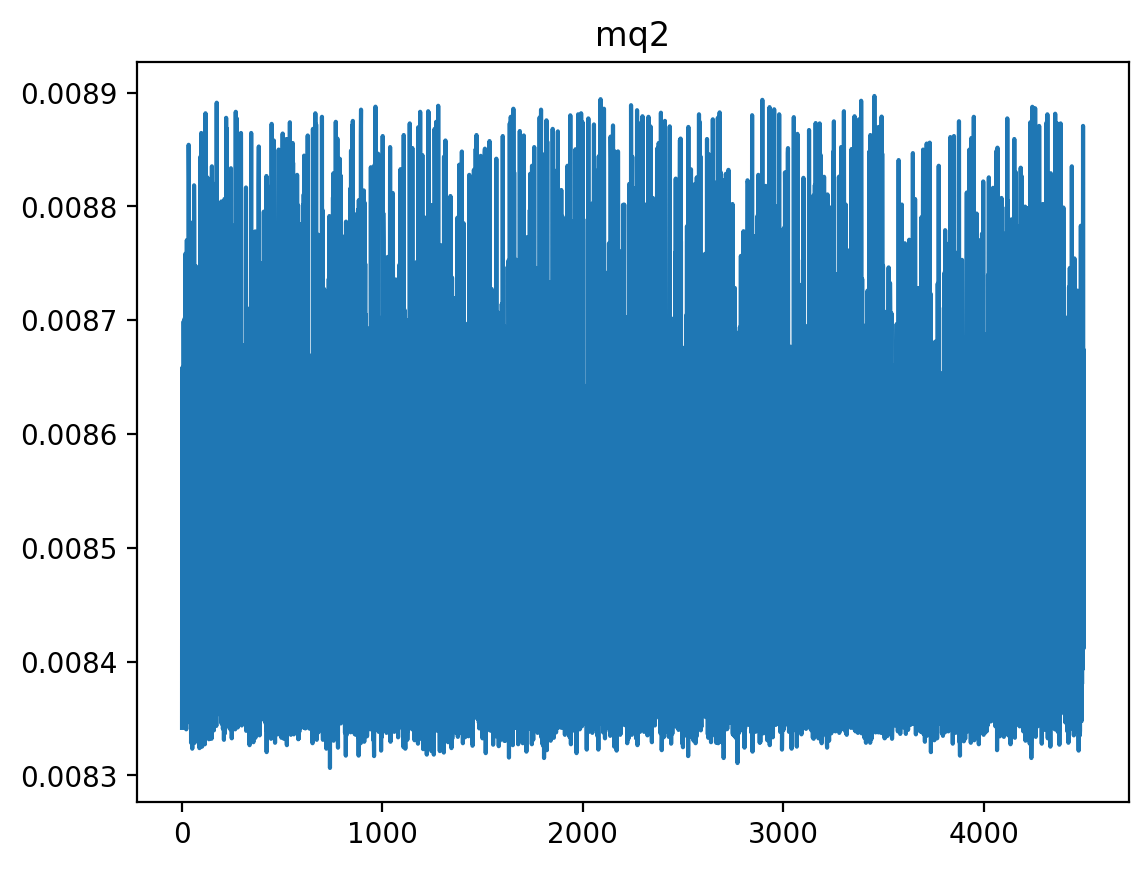

0       0.055732
1       0.055142
2       0.056140
3       0.056164
4       0.054101
          ...   
4495    0.056508
4496    0.054060
4497    0.055021
4498    0.055300
4499    0.054040
Name: mq3, Length: 4500, dtype: float64


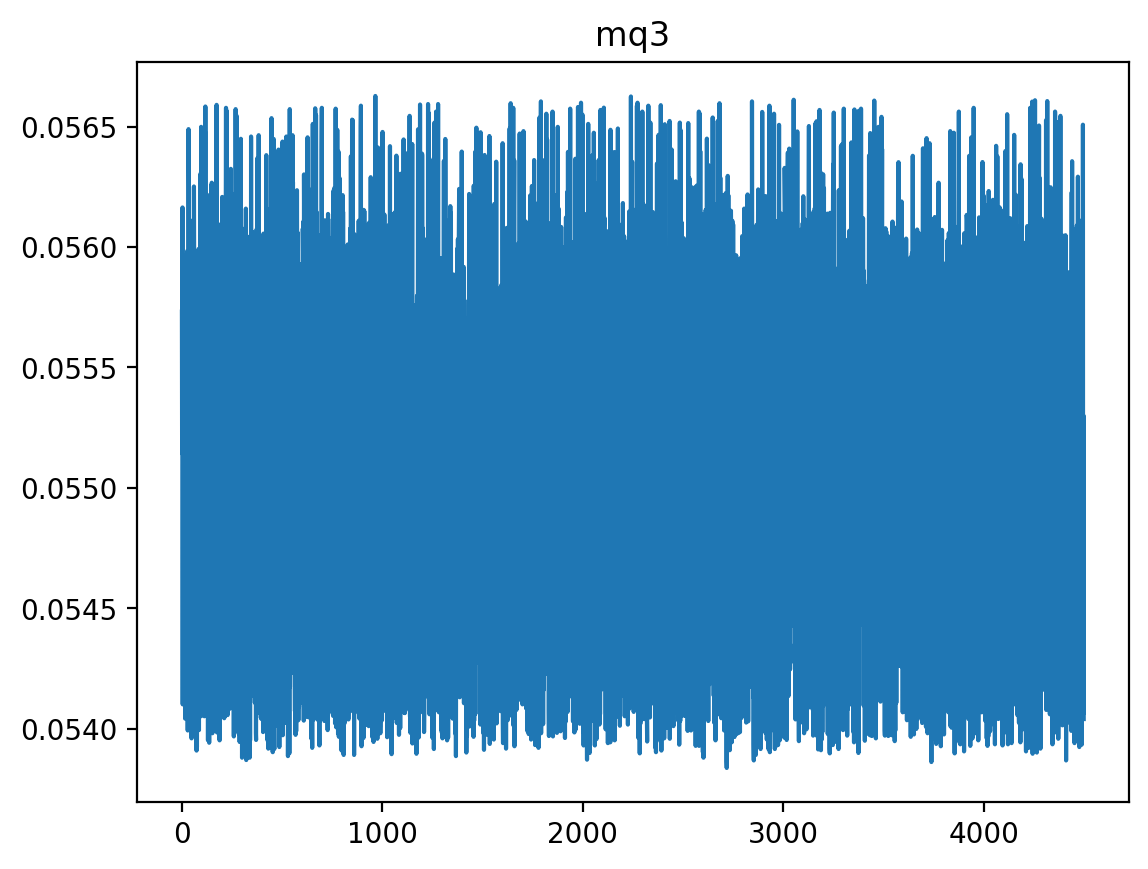

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.008631,0.054081,0.064640,0.003028,0.003110,0.003635,0.011855,0.008269,0.028009,0.018040,...,0.013971,0.012043,0.003729,0.003517,0.002589,0.005643,0.010785,0.005367,0.003778,7
4401,0.008700,0.054378,0.063457,0.003017,0.003151,0.003697,0.011487,0.008484,0.025086,0.018719,...,0.013468,0.011835,0.003597,0.003517,0.002589,0.005464,0.010550,0.005240,0.003684,7
4402,0.008626,0.054348,0.066483,0.003108,0.003102,0.003588,0.012963,0.008263,0.034341,0.019689,...,0.014747,0.012769,0.003948,0.003674,0.002670,0.005912,0.011371,0.005682,0.003967,7
4403,0.008632,0.054055,0.064588,0.003029,0.003111,0.003635,0.011844,0.008305,0.027928,0.018040,...,0.014016,0.012043,0.003729,0.003517,0.002589,0.005643,0.010785,0.005367,0.003778,7
4404,0.008613,0.054117,0.065586,0.003074,0.003109,0.003616,0.012349,0.008293,0.031175,0.018622,...,0.014382,0.012562,0.003860,0.003596,0.002589,0.005733,0.011136,0.005556,0.003873,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.008871,0.056508,0.066443,0.003400,0.003266,0.003779,0.012593,0.008957,0.020946,0.012318,...,0.010866,0.010486,0.003290,0.002970,0.002184,0.004927,0.009378,0.004293,0.003117,7
4496,0.008625,0.054060,0.065678,0.003078,0.003108,0.003619,0.012411,0.008305,0.031662,0.018816,...,0.014473,0.012562,0.003860,0.003596,0.002670,0.005823,0.011136,0.005556,0.003873,7
4497,0.008411,0.055021,0.067197,0.003333,0.003074,0.003490,0.013612,0.008350,0.025736,0.013288,...,0.011414,0.010901,0.003334,0.003048,0.002265,0.005195,0.009847,0.004420,0.003117,7
4498,0.008674,0.055300,0.066512,0.003344,0.003167,0.003687,0.012764,0.008835,0.021920,0.012803,...,0.011094,0.010693,0.003334,0.002970,0.002184,0.005016,0.009612,0.004293,0.003117,7


In [15]:
# Load the data.
data_path = '/content/milk_half_4500.csv'
data_frame_milk_half = pd.read_csv(data_path)
# Print length.
print(data_frame_milk_half.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_milk_half.loc[:, each] = data_frame_milk_half[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_milk_half = data_frame_milk_half.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_milk_half = shuffled_data_frame_milk_half.drop(shuffled_data_frame_milk_half.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_milk_half.columns[:2]:
    print(shuffled_data_frame_milk_half[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_milk_half[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_milk_half[4400:4500]

Whole milk

4500
0       0.008736
1       0.008730
2       0.008755
3       0.008746
4       0.008766
          ...   
4495    0.008770
4496    0.008774
4497    0.008576
4498    0.008745
4499    0.008777
Name: mq2, Length: 4500, dtype: float64


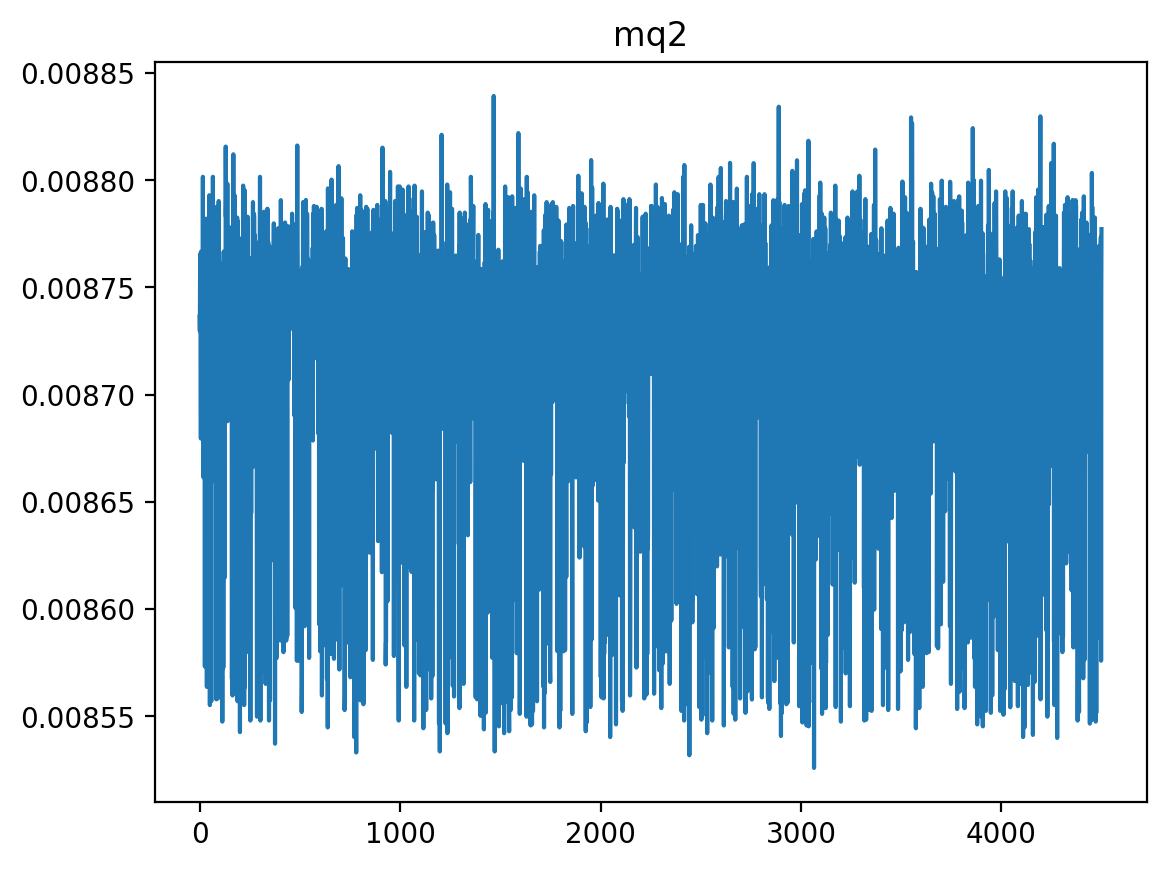

0       0.055812
1       0.055587
2       0.056303
3       0.056208
4       0.056701
          ...   
4495    0.056254
4496    0.056666
4497    0.055717
4498    0.055616
4499    0.056807
Name: mq3, Length: 4500, dtype: float64


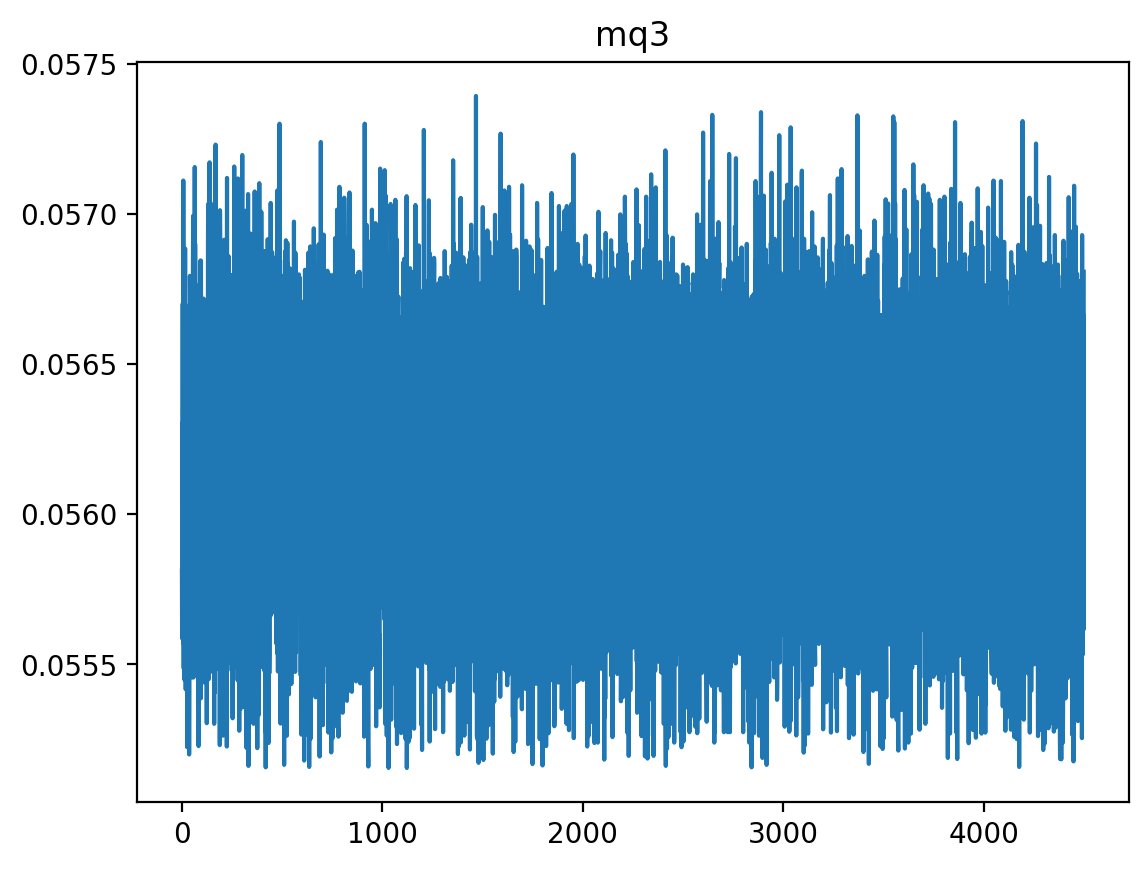

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.008774,0.056814,0.067576,0.003300,0.003295,0.003609,0.013009,0.008296,0.032149,0.017652,...,0.014108,0.016299,0.005045,0.004143,0.003074,0.006629,0.011840,0.005935,0.003873,8
4401,0.008740,0.056785,0.066919,0.003295,0.003307,0.003585,0.012206,0.008276,0.027441,0.015131,...,0.013423,0.016299,0.005089,0.004065,0.003074,0.006539,0.011840,0.005619,0.003778,8
4402,0.008762,0.056800,0.068594,0.003323,0.003329,0.003625,0.014264,0.008345,0.037589,0.020271,...,0.014884,0.015157,0.005089,0.003908,0.002913,0.006539,0.012426,0.006377,0.003967,8
4403,0.008785,0.056819,0.067514,0.003300,0.003294,0.003607,0.012999,0.008315,0.032149,0.017652,...,0.014108,0.016403,0.005045,0.004143,0.003074,0.006629,0.011957,0.005935,0.003873,8
4404,0.008769,0.056687,0.068148,0.003305,0.003325,0.003630,0.013654,0.008413,0.035072,0.019107,...,0.014519,0.015780,0.005045,0.004065,0.002994,0.006629,0.012191,0.006187,0.003873,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.008770,0.056254,0.065131,0.003368,0.003486,0.003703,0.012711,0.008444,0.027441,0.015131,...,0.011049,0.010278,0.003202,0.002970,0.002184,0.006271,0.011840,0.005556,0.003306,8
4496,0.008774,0.056666,0.068243,0.003306,0.003315,0.003623,0.013730,0.008391,0.035234,0.019204,...,0.014519,0.015884,0.005045,0.004065,0.002994,0.006629,0.012191,0.006187,0.003873,8
4497,0.008576,0.055717,0.066414,0.003288,0.003300,0.003498,0.014209,0.007889,0.032068,0.015228,...,0.011825,0.010901,0.003422,0.002970,0.002265,0.006897,0.012895,0.006124,0.003400,8
4498,0.008745,0.055616,0.065479,0.003314,0.003384,0.003609,0.013101,0.008398,0.028658,0.014743,...,0.011368,0.010693,0.003290,0.002970,0.002265,0.006539,0.012426,0.005809,0.003400,8


In [16]:
# Load the data.
data_path = '/content/milk_whole_4500.csv'
data_frame_milk_whole = pd.read_csv(data_path)
# Print length.
print(data_frame_milk_whole.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_milk_whole.loc[:, each] = data_frame_milk_whole[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_milk_whole = data_frame_milk_whole.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_milk_whole = shuffled_data_frame_milk_whole.drop(shuffled_data_frame_milk_whole.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_milk_whole.columns[:2]:
    print(shuffled_data_frame_milk_whole[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_milk_whole[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_milk_whole[4400:4500]

With vanilla

4500
0       0.008566
1       0.008362
2       0.008623
3       0.008633
4       0.008617
          ...   
4495    0.008486
4496    0.008599
4497    0.008032
4498    0.008377
4499    0.008637
Name: mq2, Length: 4500, dtype: float64


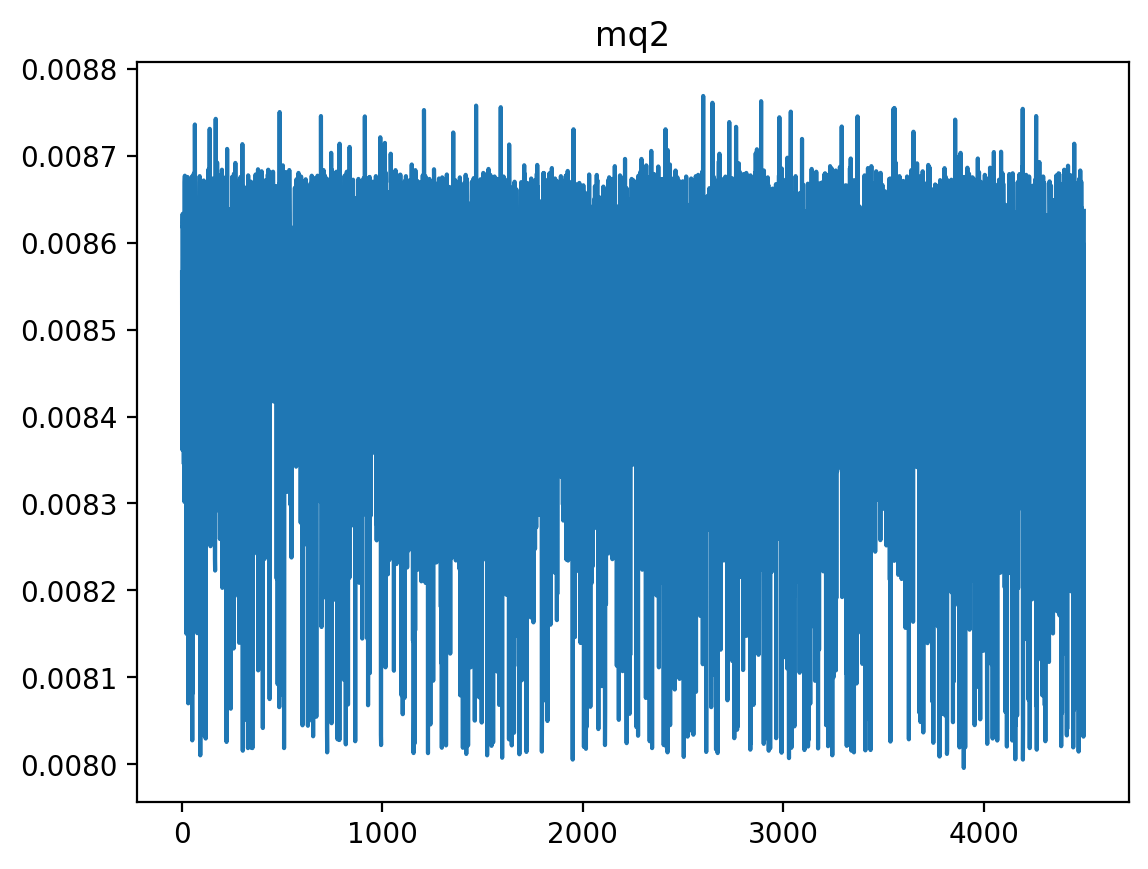

0       0.055380
1       0.055002
2       0.055729
3       0.055717
4       0.055766
          ...   
4495    0.055314
4496    0.055778
4497    0.055162
4498    0.054874
4499    0.055741
Name: mq3, Length: 4500, dtype: float64


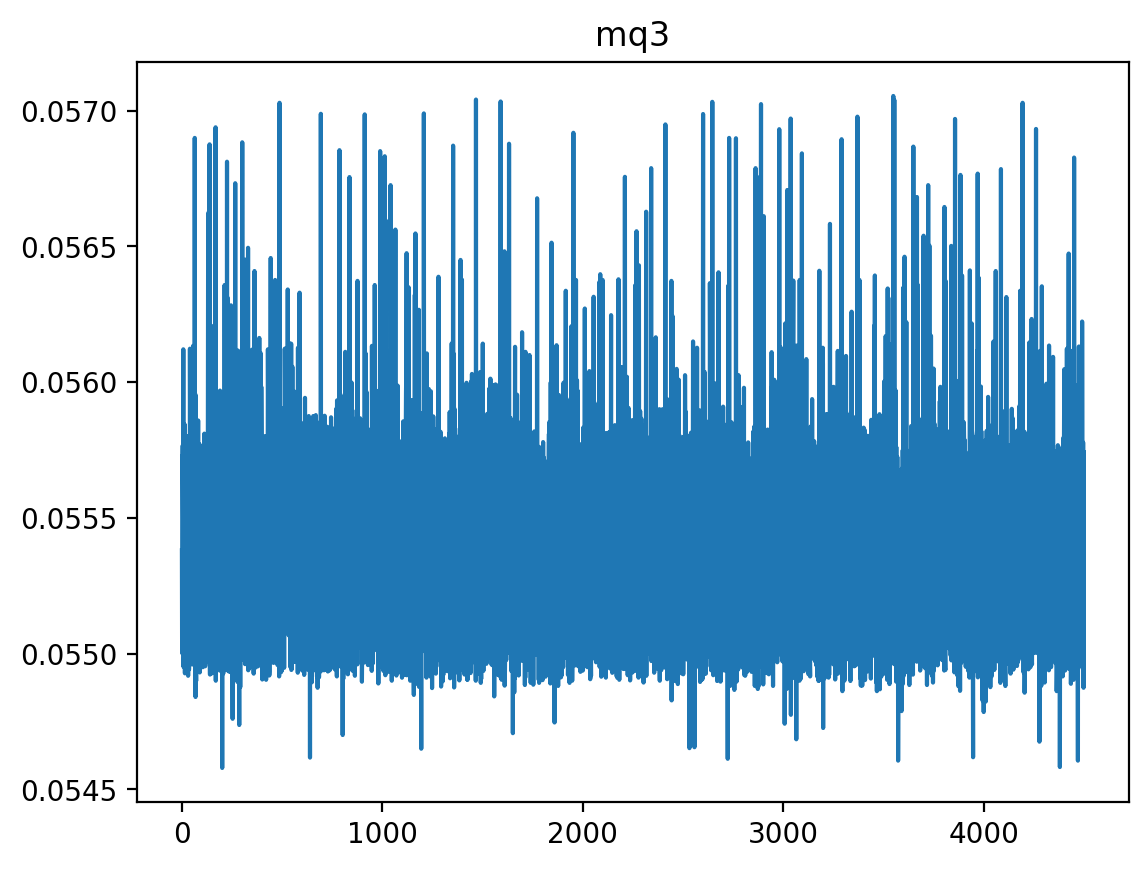

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
4400,0.008646,0.055707,0.067315,0.003273,0.003332,0.003597,0.013265,0.008209,0.043028,0.019398,...,0.013240,0.014534,0.003992,0.003752,0.002832,0.006360,0.012074,0.005367,0.003684,9
4401,0.008684,0.055851,0.066424,0.003257,0.003340,0.003602,0.012701,0.008162,0.043596,0.018234,...,0.012236,0.014431,0.003685,0.003674,0.002832,0.006181,0.011722,0.005177,0.003495,9
4402,0.008599,0.056048,0.068678,0.003309,0.003310,0.003562,0.014391,0.008197,0.041892,0.021920,...,0.014290,0.015053,0.004299,0.003908,0.002913,0.006718,0.012895,0.005682,0.003778,9
4403,0.008640,0.055679,0.067297,0.003273,0.003326,0.003597,0.013251,0.008228,0.043109,0.019398,...,0.013240,0.014742,0.003948,0.003752,0.002832,0.006360,0.012074,0.005367,0.003684,9
4404,0.008619,0.055814,0.068028,0.003286,0.003317,0.003582,0.013807,0.008214,0.041405,0.020562,...,0.013834,0.014846,0.004167,0.003830,0.002913,0.006539,0.012308,0.005556,0.003778,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.008486,0.055314,0.063867,0.003208,0.003353,0.003827,0.014121,0.008632,0.034666,0.014064,...,0.014929,0.010693,0.004167,0.003205,0.002346,0.005285,0.010550,0.005304,0.003778,9
4496,0.008599,0.055778,0.068053,0.003287,0.003316,0.003581,0.013862,0.008278,0.041323,0.020659,...,0.013879,0.014742,0.004167,0.003830,0.002913,0.006539,0.012426,0.005556,0.003778,9
4497,0.008032,0.055162,0.065738,0.003158,0.003292,0.003646,0.014297,0.007971,0.038888,0.015713,...,0.016893,0.011420,0.004562,0.003361,0.002427,0.005912,0.011488,0.005619,0.004061,9
4498,0.008377,0.054874,0.064175,0.003175,0.003315,0.003799,0.014138,0.008535,0.035640,0.014937,...,0.015888,0.011108,0.004387,0.003283,0.002427,0.005554,0.010785,0.005493,0.003967,9


In [17]:
# Load the data.
data_path = '/content/vanilla_4500.csv'
data_frame_vanilla = pd.read_csv(data_path)
# Print length.
print(data_frame_vanilla.shape[0])

# We divide because during conversion to google sheets all values got multiplied with 10000.
for each in sensor_names:
    data_frame_vanilla.loc[:, each] = data_frame_vanilla[each] / DIVISION_VALUE

# Shuffle the dataframe.
shuffled_data_frame_vanilla = data_frame_vanilla.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the first unused column (which has no name).
shuffled_data_frame_vanilla = shuffled_data_frame_vanilla.drop(shuffled_data_frame_vanilla.columns[0], axis=1)

# Plot the diagrams of some sensor.
for column in shuffled_data_frame_vanilla.columns[:2]:
    print(shuffled_data_frame_vanilla[column])
    plt.figure()
    plt.title(column)
    plt.plot(shuffled_data_frame_vanilla[column][:])
    plt.show()

# Print some values.
shuffled_data_frame_vanilla[4400:4500]

Merge all dataframes

In [18]:
concatenated_data_frame = pd.concat([shuffled_data_frame_only_butter, shuffled_data_frame_half_sugar, shuffled_data_frame_whole_sugar, shuffled_data_frame_two_eggs, shuffled_data_frame_four_eggs, shuffled_data_frame_flour_half, shuffled_data_frame_flour_whole, shuffled_data_frame_milk_half, shuffled_data_frame_milk_whole, shuffled_data_frame_vanilla])
print(concatenated_data_frame.shape[0])

45000


In [19]:
# concatenated_data_frame[4490:4505]

In [20]:
# Inspect the data
concatenated_data_frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mq2,45000.0,0.008324,0.000588,0.006162,0.007944,0.008490,0.008732,0.009456
mq3,45000.0,0.052585,0.005302,0.036061,0.047729,0.055256,0.056075,0.060572
mq8,45000.0,0.066883,0.001719,0.057060,0.065827,0.067025,0.068118,0.070542
mq135,45000.0,0.003055,0.000348,0.002054,0.002714,0.003167,0.003323,0.003554
mq136,45000.0,0.002989,0.000501,0.001745,0.002559,0.003150,0.003345,0.003775
mq137,45000.0,0.003342,0.000424,0.002198,0.003059,0.003496,0.003650,0.003999
mq131,45000.0,0.012423,0.001455,0.008455,0.011572,0.012718,0.013502,0.015062
mq9,45000.0,0.008022,0.000633,0.005592,0.007687,0.008160,0.008424,0.009352
scp1,45000.0,0.038541,0.012793,0.020865,0.028415,0.035072,0.044895,0.073960
scp2,45000.0,0.017220,0.004486,0.009602,0.013773,0.016101,0.019883,0.027545


Shuffle the concatenated data frame

In [21]:
shuffled_data_frame = concatenated_data_frame.sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
shuffled_data_frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mq2,45000.0,0.008324,0.000588,0.006162,0.007944,0.008490,0.008732,0.009456
mq3,45000.0,0.052585,0.005302,0.036061,0.047729,0.055256,0.056075,0.060572
mq8,45000.0,0.066883,0.001719,0.057060,0.065827,0.067025,0.068118,0.070542
mq135,45000.0,0.003055,0.000348,0.002054,0.002714,0.003167,0.003323,0.003554
mq136,45000.0,0.002989,0.000501,0.001745,0.002559,0.003150,0.003345,0.003775
mq137,45000.0,0.003342,0.000424,0.002198,0.003059,0.003496,0.003650,0.003999
mq131,45000.0,0.012423,0.001455,0.008455,0.011572,0.012718,0.013502,0.015062
mq9,45000.0,0.008022,0.000633,0.005592,0.007687,0.008160,0.008424,0.009352
scp1,45000.0,0.038541,0.012793,0.020865,0.028415,0.035072,0.044895,0.073960
scp2,45000.0,0.017220,0.004486,0.009602,0.013773,0.016101,0.019883,0.027545


In [23]:
shuffled_data_frame[:100]

,mq2,mq3,mq8,mq135,mq136,mq137,mq131,mq9,scp1,scp2,...,scp10,scp11,scp12,scp13,scp14,scp15,scp16,scp17,scp18,target
0,0.008660,0.055447,0.066647,0.003412,0.003354,0.003658,0.013806,0.008572,0.033042,0.017846,...,0.012738,0.012977,0.003729,0.003439,0.002589,0.005823,0.010785,0.005556,0.003400,8
1,0.006869,0.046300,0.067028,0.002559,0.002503,0.002880,0.012189,0.006960,0.033692,0.014161,...,0.013423,0.012043,0.003509,0.003127,0.002346,0.005285,0.009730,0.004104,0.003211,2
2,0.008654,0.055678,0.067263,0.003267,0.003326,0.003598,0.013224,0.008187,0.043353,0.019301,...,0.013194,0.014534,0.003948,0.003752,0.002832,0.006360,0.012074,0.005367,0.003684,9
3,0.008348,0.055901,0.067873,0.002798,0.002635,0.003012,0.013640,0.007389,0.051390,0.020950,...,0.015843,0.013911,0.004255,0.003674,0.002751,0.006360,0.011488,0.005240,0.003684,3
4,0.008347,0.054956,0.064265,0.003169,0.003312,0.003786,0.014162,0.008485,0.036696,0.015131,...,0.016071,0.011005,0.004431,0.003283,0.002427,0.005554,0.010902,0.005493,0.003967,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.007232,0.047712,0.066670,0.002581,0.002492,0.003075,0.010627,0.007780,0.034098,0.013870,...,0.013286,0.011835,0.003509,0.003048,0.002346,0.005375,0.009730,0.003978,0.003117,1
96,0.008383,0.055467,0.066272,0.003340,0.003447,0.003557,0.011792,0.007847,0.029145,0.014646,...,0.012236,0.012769,0.003860,0.003283,0.002508,0.005554,0.010550,0.004609,0.003306,5
97,0.008395,0.055685,0.066308,0.003346,0.003453,0.003563,0.011760,0.007871,0.029145,0.014549,...,0.012236,0.012769,0.003860,0.003283,0.002508,0.005554,0.010550,0.004609,0.003211,5
98,0.008675,0.055701,0.066481,0.003248,0.003337,0.003612,0.012745,0.008122,0.043109,0.018428,...,0.012327,0.014742,0.003729,0.003674,0.002832,0.006181,0.011722,0.005177,0.003495,9


Manipulation of data.

In [24]:
# Seperate the data in test and train
data_frame_train = shuffled_data_frame[:40000]
data_frame_test = shuffled_data_frame[40000:45000]

In [25]:
# Convert dataframe to .csv file.
data_frame_train.to_csv('data_frame_train.csv', index=False)
data_frame_test.to_csv('data_frame_test.csv', index=False)

In [26]:
# Separate the data into features and targets
target_field = ['target']
data_frame_train_features, data_frame_train_targets = data_frame_train.drop(target_field, axis=1), data_frame_train[target_field]
data_frame_test_features, data_frame_test_targets = data_frame_test.drop(target_field, axis=1), data_frame_test[target_field]

In [27]:
print(data_frame_test_features[:1].to_string())

          mq2     mq3       mq8     mq135     mq136    mq137     mq131       mq9      scp1      scp2      scp3      scp4      scp5     scp6      scp7      scp8      scp9     scp10     scp11     scp12     scp13     scp14     scp15     scp16     scp17     scp18
40000  0.0071  0.0462  0.066729  0.002547  0.002528  0.00292  0.009678  0.007478  0.030769  0.013094  0.021364  0.008834  0.015785  0.02529  0.022349  0.024583  0.042495  0.013057  0.011628  0.003466  0.003048  0.002265  0.005106  0.009261  0.003978  0.003117


In [28]:
# Normalize data

# The mean and standard deviation should only be computed using the training data
# so that the models have no access to the values in the validation and test sets.
train_mean = data_frame_train_features.mean()
train_std = data_frame_train_features.std()
print(train_mean)
print(type(train_mean))
print(train_std)
data_frame_train_features = (data_frame_train_features - train_mean) / train_std
data_frame_test_features = (data_frame_test_features - train_mean) / train_std


mq2      0.008323
mq3      0.052580
mq8      0.066875
mq135    0.003054
mq136    0.002988
mq137    0.003342
mq131    0.012425
mq9      0.008020
scp1     0.038536
scp2     0.017223
scp3     0.029405
scp4     0.011570
scp5     0.019415
scp6     0.027198
scp7     0.023722
scp8     0.026574
scp9     0.046375
scp10    0.014083
scp11    0.013034
scp12    0.003946
scp13    0.003488
scp14    0.002594
scp15    0.005946
scp16    0.010993
scp17    0.004972
scp18    0.003506
dtype: float64
<class 'pandas.core.series.Series'>
mq2      0.000587
mq3      0.005300
mq8      0.001722
mq135    0.000347
mq136    0.000501
mq137    0.000424
mq131    0.001455
mq9      0.000633
scp1     0.012789
scp2     0.004485
scp3     0.007688
scp4     0.002842
scp5     0.003856
scp6     0.004212
scp7     0.003610
scp8     0.003915
scp9     0.005986
scp10    0.001772
scp11    0.001529
scp12    0.000475
scp13    0.000377
scp14    0.000269
scp15    0.000682
scp16    0.001220
scp17    0.000661
scp18    0.000318
dtype: float6

In [29]:
# Create test features list.
data_frame_test_features_list=[]

for row in data_frame_test_features.iterrows():
    index, data = row
    data_frame_test_features_list.append(data.tolist())

# Create test targets list.
data_frame_test_targets_list=[]

for row in data_frame_test_targets.iterrows():
    index, data = row
    data_frame_test_targets_list.append(data.tolist())


# Create data features list.
data_frame_train_features_list=[]

for row in data_frame_train_features.iterrows():
    index, data = row
    data_frame_train_features_list.append(data.tolist())

# Create data targets list.
data_frame_train_targets_list=[]

for row in data_frame_train_targets.iterrows():
    index, data = row
    data_frame_train_targets_list.append(data.tolist())

In [30]:
"""
print(data_frame_train_features_list[:10])
print(data_frame_train_targets_list[:10])
print(len(data_frame_train_targets_list))
print(len(data_frame_test_targets_list))
"""

'\nprint(data_frame_train_features_list[:10])\nprint(data_frame_train_targets_list[:10])\nprint(len(data_frame_train_targets_list))\nprint(len(data_frame_test_targets_list))\n'

In [31]:
# Split into training and validation data.
# Hold out the last 10000 entries of the remaining data as a validation set.
train_only_features, train_only_targets = np.array(data_frame_train_features_list[:30000]), np.array(data_frame_train_targets_list[:30000])
val_only_features, val_only_targets = np.array(data_frame_train_features_list[30000:]), np.array(data_frame_train_targets_list[30000:])
test_features, test_targets = np.array(data_frame_test_features_list[:]), np.array(data_frame_test_targets_list[:])

In [32]:
# Convert to categorical.
train_targets_categorical = tf.keras.utils.to_categorical(train_only_targets, dtype ="uint8")
val_targets_categorical = tf.keras.utils.to_categorical(val_only_targets, dtype ="uint8")
test_targets_categorical = tf.keras.utils.to_categorical(test_targets, dtype ="uint8")

In [33]:
print)

SyntaxError: ignored

In [ ]:
#@title Dense Model
# Model
model=Sequential()
model.add(Dense(256, input_dim=26,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10))

print(model.summary())

In [ ]:
#@title Compile

adam = Adam(learning_rate=0.000001)
# https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [ ]:
#@title Checkpoint

batch_size = 50
num_epochs = 500

checkpoint = ModelCheckpoint(filepath='cake_10_classes.weights.best.h5', verbose=1,
                               save_best_only=True, monitor='val_accuracy',)

callbacks_list = [checkpoint]


In [ ]:
#@title Fit
history = model.fit(train_only_features,
                    train_targets_categorical,
                    validation_data=(val_only_features, val_targets_categorical),
                    batch_size=batch_size,
                    epochs=num_epochs,
                    callbacks=callbacks_list)

In [ ]:
#@title History
#Get history
history_dict = history.history
history_dict.keys()

#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "g" is for "solid green line"
plt.plot(epochs, loss, 'g', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#@title Reconstruct and inference
reconstructed_model = keras.models.load_model("/content/cake_10_classes.weights.best.h5")

#Evaluate model with the test set
print(len(test_features))
scores = reconstructed_model.evaluate(val_only_features, val_targets_categorical, verbose=1)

#Predict an output with one entry
for number in range(0, 2):
    test_features = np.array(data_frame_test_features_list[number])
    test_features = np.expand_dims(test_features, axis=0)
    # print(test_features)
    score = reconstructed_model.predict(test_features, verbose=1)
    print(score)
    ##Show the argmax label
    print(tf.math.argmax(score[0]))
    print(data_frame_test_targets_list[number])

#Save the model to the saved model format
reconstructed_model.save('/content/saved_model')

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('cake_model.tflite', 'wb') as f:
  f.write(tflite_model)

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/cake_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors details.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

for number in range(0, 2):
    test_features = np.array(data_frame_test_features_list[number])
    test_features = np.expand_dims(test_features, axis=0)
    interpreter.set_tensor(input_details[0]['index'], tf.cast(test_features, tf.float32))

    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print(output_data)
    print(tf.math.argmax(output_data[0]))
    print(data_frame_test_targets_list[number])

##Build a Conv-1D Keras model
Reference: https://keras.io/examples/timeseries/timeseries_classification_from_scratch/

In [34]:
x_train = train_only_features.reshape((train_only_features.shape[0], train_only_features.shape[1], 1))
y_train = val_only_features.reshape((val_only_features.shape[0], val_only_features.shape[1], 1))
x_test = test_features.reshape((test_features.shape[0], test_features.shape[1], 1))
print(x_train.shape)

(30000, 26, 1)


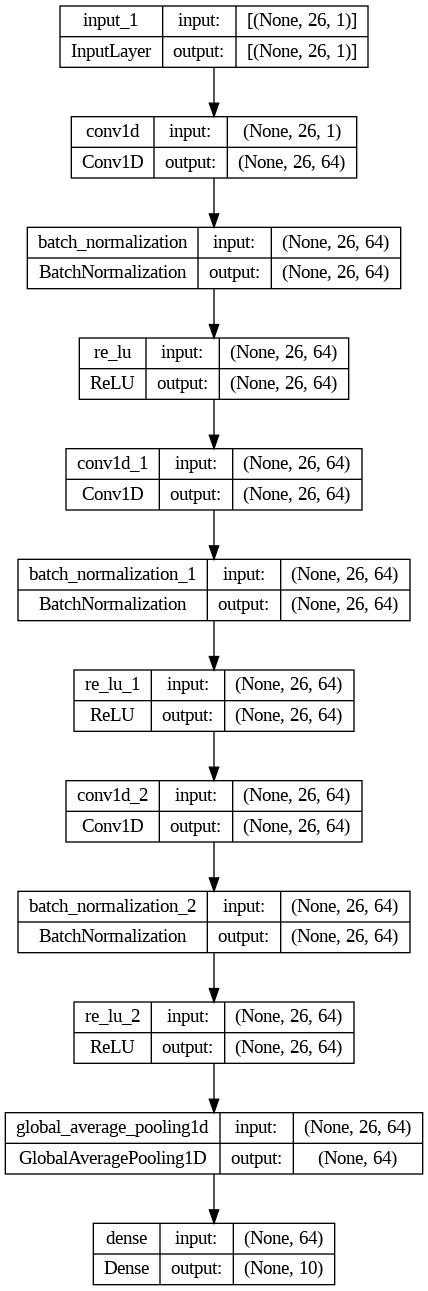

In [35]:

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(10, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)


In [ ]:
# print(x_train.shape[1:])

In [36]:
epochs = 5
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_accuracy"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

In [37]:

history = model.fit(x_train,
                    train_targets_categorical,
                    validation_data=(y_train, val_targets_categorical),
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=callbacks)

Epoch 1/5
938/938 [==============================] - ETA: 0s - loss: 0.3757 - categorical_accuracy: 0.9238

938/938 [==============================] - 20s 9ms/step - loss: 0.3757 - categorical_accuracy: 0.9238 - val_loss: 0.0402 - val_categorical_accuracy: 0.9977 - lr: 0.0010
Epoch 2/5
936/938 [============================>.] - ETA: 0s - loss: 0.0253 - categorical_accuracy: 0.9981

938/938 [==============================] - 10s 10ms/step - loss: 0.0253 - categorical_accuracy: 0.9981 - val_loss: 0.0059 - val_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 3/5
932/938 [============================>.] - ETA: 0s - loss: 0.0114 - categorical_accuracy: 0.9987

938/938 [==============================] - 9s 9ms/step - loss: 0.0114 - categorical_accuracy: 0.9987 - val_loss: 0.0029 - val_categorical_accuracy: 0.9999 - lr: 0.0010
Epoch 4/5
935/938 [============================>.] - ETA: 0s - loss: 0.0048 - categorical_accuracy: 0.9992

938/938 [==============================] - 7s 7ms/step - loss: 0.0048 - categorical_accuracy: 0.9992 - val_loss: 0.0067 - val_categorical_accuracy: 0.9992 - lr: 0.0010
Epoch 5/5
936/938 [============================>.] - ETA: 0s - loss: 0.0093 - categorical_accuracy: 0.9981

938/938 [==============================] - 8s 9ms/step - loss: 0.0093 - categorical_accuracy: 0.9981 - val_loss: 0.0018 - val_categorical_accuracy: 1.0000 - lr: 0.0010


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


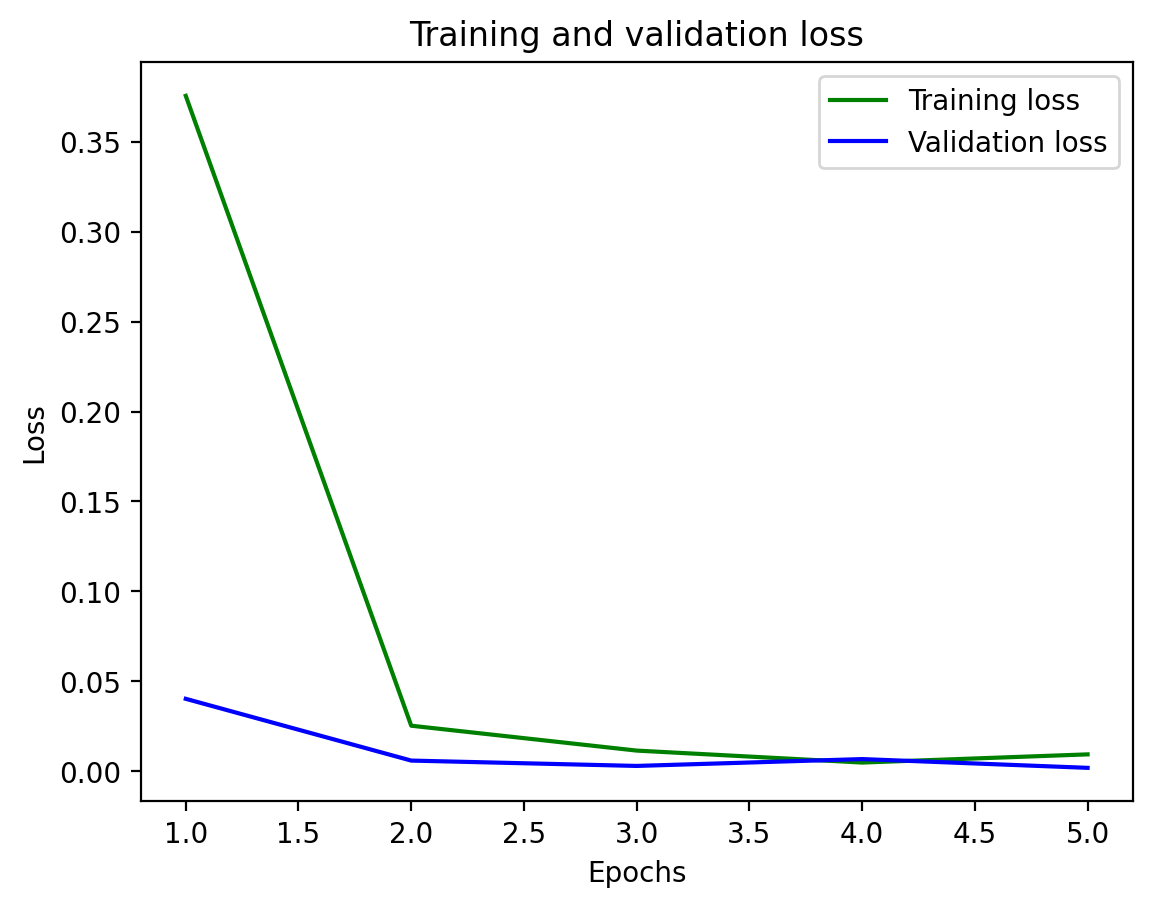

In [38]:
#Get history
history_dict = history.history
history_dict.keys()

print(history_dict.keys())

#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
import matplotlib.pyplot as plt

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "g" is for "solid green line"
plt.plot(epochs, loss, 'g', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
#Evaluate model with the test set
print(len(test_features))
scores = model.evaluate(x_test, test_targets_categorical, verbose=1)

5000
157/157 [==============================] - 1s 5ms/step - loss: 0.0019 - categorical_accuracy: 1.0000


In [40]:
#Save the model to the saved model format
model.save('/content/saved_model')

In [41]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('cake_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [42]:
# Predict an output with one entry
test_list = [0.0071,  0.0462,  0.066729,  0.002547 , 0.002528 , 0.00292  ,0.009678,  0.007478 , 0.030769 , 0.013094 , 0.021364 , 0.008834 , 0.015785 , 0.02529 , 0.022349,  0.024583 , 0.042495 , 0.013057 , 0.011628 , 0.003466 , 0.003048 , 0.002265 , 0.005106 , 0.009261 , 0.003978 , 0.003117]
#print(train_mean)
mean_list = [0.008323,
        0.052580,
        0.066875,
        0.003054,
        0.002988,
        0.003342,
        0.012425,
        0.008020,
        0.038536,
        0.017223,
        0.029405,
        0.011570,
        0.019415,
        0.027198,
        0.023722,
        0.026574,
        0.046375,
        0.014083,
        0.013034,
        0.003946,
        0.003488,
        0.002594,
        0.005946,
        0.010993,
        0.004972,
        0.003506]
std_list = [0.000587,
        0.005300,
        0.001722,
        0.000347,
        0.000501,
        0.000424,
        0.001455,
        0.000633,
        0.012789,
        0.004485,
        0.007688,
        0.002842,
        0.003856,
        0.004212,
        0.003610,
        0.003915,
        0.005986,
        0.001772,
        0.001529,
        0.000475,
        0.000377,
        0.000269,
        0.000682,
        0.001220,
        0.000661,
        0.000318]
#print(train_std)
converted_list = []

for i in range(0,len(test_list)):
  converted_list.append((test_list[i] - mean_list[i]) / std_list[i])

print(converted_list)

test_features = np.array(converted_list)
test_features = np.expand_dims(test_features, axis=0)
print(test_features)
score = model.predict(test_features, verbose=1)
# print(score)
## Show the argmax label
print(tf.math.argmax(score[0]))
print(data_frame_test_targets_list[0])





# Predict outputs from the test set.
for number in range(0, 4):
    test_features = np.array(data_frame_test_features_list[number])
    test_features = np.expand_dims(test_features, axis=0)
    print(test_features)
    score = model.predict(test_features, verbose=1)
    # print(score)
    ## Show the argmax label
    print(tf.math.argmax(score[0]))
    print(data_frame_test_targets_list[number])

[-2.083475298126065, -1.203773584905661, -0.08478513356562557, -1.4610951008645536, -0.9181636726546912, -0.9952830188679247, -1.887972508591065, -0.8562401263823051, -0.6073187895847995, -0.9206243032329986, -1.0459157127991674, -0.9627023223082338, -0.9413900414937763, -0.45299145299145305, -0.38033240997229895, -0.5085568326947636, -0.6481790845305716, -0.5790067720090298, -0.9195552648790065, -1.0105263157894735, -1.1671087533156506, -1.223048327137546, -1.2316715542521988, -1.4196721311475404, -1.5037821482602118, -1.2232704402515724]
[[-2.0834753  -1.20377358 -0.08478513 -1.4610951  -0.91816367 -0.99528302
  -1.88797251 -0.85624013 -0.60731879 -0.9206243  -1.04591571 -0.96270232
  -0.94139004 -0.45299145 -0.38033241 -0.50855683 -0.64817908 -0.57900677
  -0.91955526 -1.01052632 -1.16710875 -1.22304833 -1.23167155 -1.41967213
  -1.50378215 -1.22327044]]
1/1 [==============================] - 0s 183ms/step
tf.Tensor(2, shape=(), dtype=int64)
[2]
[[-2.08225583 -1.20373041 -0.08460314

In [44]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/cake_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors details.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

for number in range(0, 4):
    test_features = np.array(data_frame_test_features_list[number])
    # print(test_features.shape)
    test_features = np.expand_dims(test_features, axis=0)
    test_features = np.expand_dims(test_features, axis=2)
    # print(test_features.shape)
    interpreter.set_tensor(input_details[0]['index'], tf.cast(test_features, tf.float32))

    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    # print(output_data)
    print(tf.math.argmax(output_data[0]))
    print(data_frame_test_targets_list[number])

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 26,  1], dtype=int32), 'shape_signature': array([-1, 26,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 23, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
tf.Tensor(2, shape=(), dtype=int64)
[2]
tf.Tensor(6, shape=(), dtype=int64)
[6]
tf.Tensor(2, shape=(), dtype=int64)
[2]
tf.Tensor(7, shape=(), dtype=int64)
[7]
